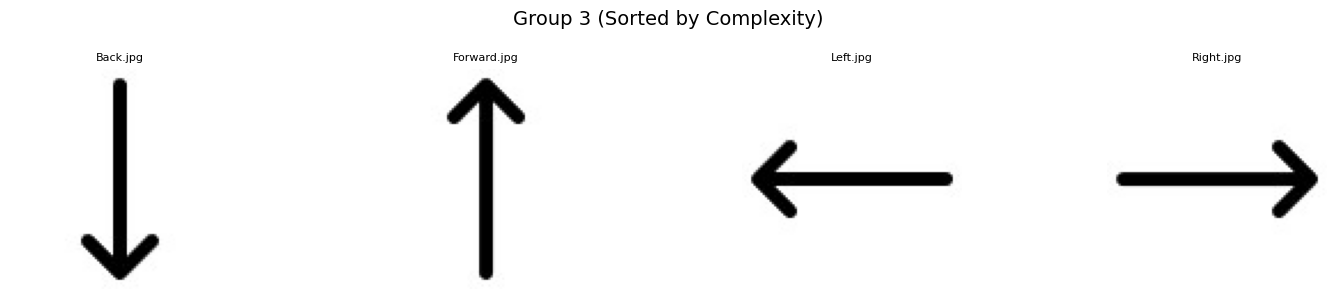

Complexity Metrics for Group 3


Filename  Edge Density  Entropy   H Sym   V Sym  Complexity
0     Back.jpg        0.0292   1.0318  0.9993  0.9503      1.0610
1  Forward.jpg        0.0291   1.0382  0.9991  0.9505      1.0673
2     Left.jpg        0.0291   0.9278  0.9503  0.9993      0.9569
3    Right.jpg        0.0291   1.0719  0.9505  0.9987      1.1010

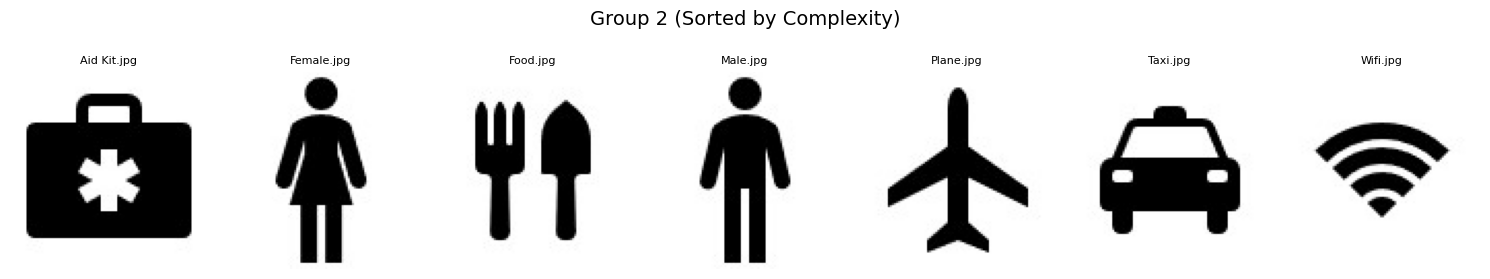

Complexity Metrics for Group 2


Filename  Edge Density  Entropy   H Sym   V Sym  Complexity
0  Aid Kit.jpg        0.0540   1.7678  0.9996  0.7795      1.8219
1   Female.jpg        0.0445   1.9833  0.9954  0.8943      2.0278
2     Food.jpg        0.0460   1.9781  0.9527  0.8173      2.0241
3     Male.jpg        0.0445   1.7435  0.9985  0.8748      1.7880
4    Plane.jpg        0.0405   1.7819  0.9996  0.8646      1.8223
5     Taxi.jpg        0.0456   1.7693  0.9998  0.7020      1.8149
6     Wifi.jpg        0.0464   1.6545  0.9972  0.8600      1.7009

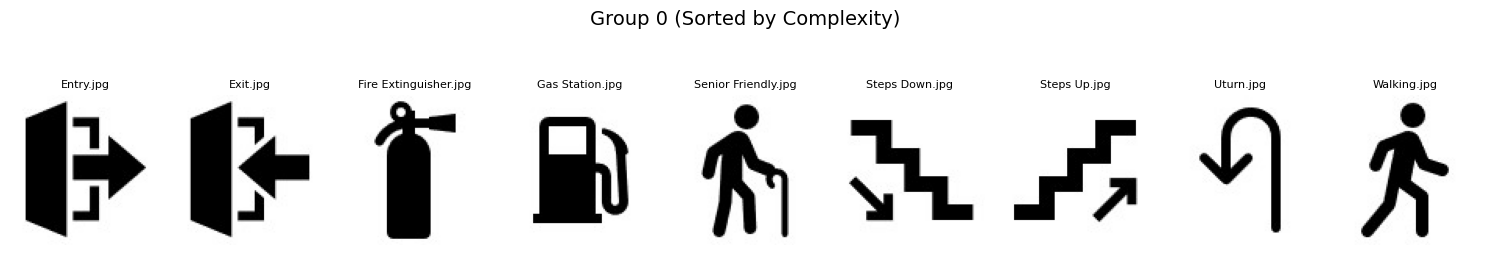

Complexity Metrics for Group 0


Filename  Edge Density  Entropy   H Sym   V Sym  Complexity
0              Entry.jpg        0.0559   2.3153  0.6332  0.9418      2.3712
1               Exit.jpg        0.0545   2.2402  0.6020  0.9449      2.2947
2  Fire Extinguisher.jpg        0.0386   1.6544  0.8181  0.8819      1.6930
3        Gas Station.jpg        0.0539   1.9186  0.8099  0.8355      1.9726
4    Senior Friendly.jpg        0.0541   2.2433  0.7585  0.8184      2.2975
5         Steps Down.jpg        0.0439   1.6231  0.7721  0.7847      1.6671
6           Steps Up.jpg        0.0430   1.5464  0.7420  0.7420      1.5894
7              Uturn.jpg        0.0429   1.4836  0.8088  0.8878      1.5265
8            Walking.jpg        0.0458   2.0453  0.8455  0.8134      2.0911

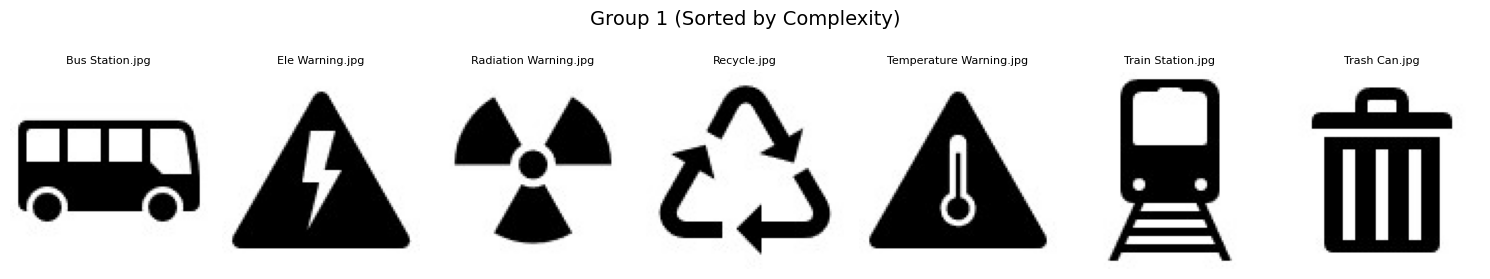

Complexity Metrics for Group 1


Filename  Edge Density  Entropy   H Sym   V Sym  Complexity
0          Bus Station.jpg        0.0712   2.1711  0.8770  0.7185      2.2423
1          Ele Warning.jpg        0.0490   2.2167  0.9742  0.6118      2.2657
2    Radiation Warning.jpg        0.0456   2.0611  0.9991  0.5938      2.1066
3              Recycle.jpg        0.0637   2.4141  0.9043  0.6929      2.4778
4  Temperature Warning.jpg        0.0558   2.3057  0.9987  0.6146      2.3615
5        Train Station.jpg        0.0743   1.9523  0.9989  0.7832      2.0266
6            Trash Can.jpg        0.0773   1.9822  0.9996  0.8164      2.0594

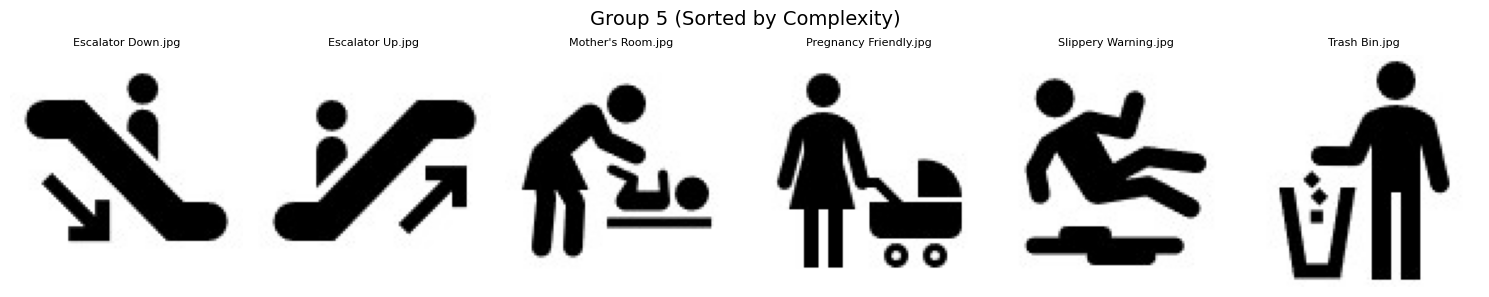

Complexity Metrics for Group 5


Filename  Edge Density  Entropy   H Sym   V Sym  Complexity
0      Escalator Down.jpg        0.0553   2.1544  0.7144  0.7148      2.2098
1        Escalator Up.jpg        0.0551   2.2127  0.7201  0.7374      2.2679
2       Mother's Room.jpg        0.0647   2.4245  0.7322  0.7370      2.4891
3  Pregnancy Friendly.jpg        0.0686   2.2615  0.6823  0.7331      2.3301
4    Slippery Warning.jpg        0.0650   2.6320  0.7669  0.6905      2.6970
5           Trash Bin.jpg        0.0712   2.4702  0.6541  0.7400      2.5414

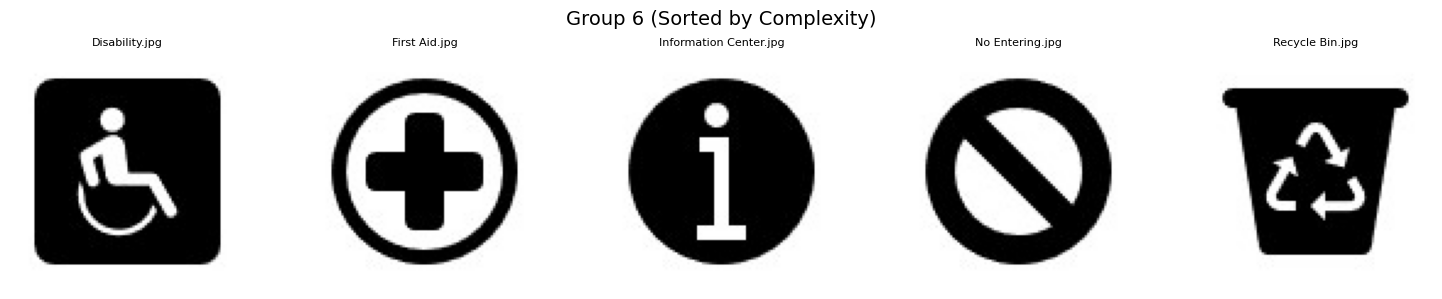

Complexity Metrics for Group 6


Filename  Edge Density  Entropy   H Sym   V Sym  Complexity
0          Disability.jpg        0.0658   2.3583  0.8952  0.9043      2.4240
1           First Aid.jpg        0.0751   2.5842  0.9983  0.9978      2.6593
2  Information Center.jpg        0.0474   2.3817  0.9829  0.9668      2.4291
3         No Entering.jpg        0.0611   2.7745  0.8954  0.8950      2.8356
4         Recycle Bin.jpg        0.0553   2.3915  0.9703  0.8327      2.4469

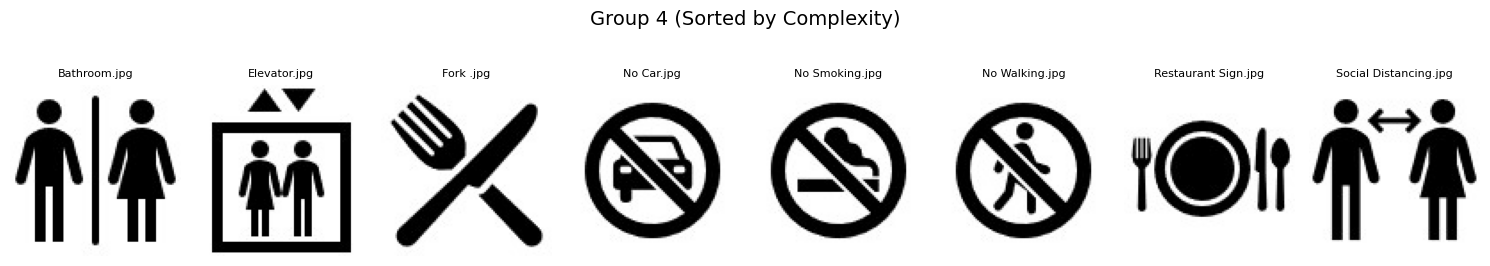

Complexity Metrics for Group 4


Filename  Edge Density  Entropy   H Sym   V Sym  Complexity
0           Bathroom.jpg        0.0979   2.5560  0.9642  0.8314      2.6538
1           Elevator.jpg        0.1209   2.4896  0.9614  0.6970      2.6105
2              Fork .jpg        0.0911   2.8220  0.7895  0.7483      2.9131
3             No Car.jpg        0.0931   3.1327  0.9286  0.9047      3.2258
4         No Smoking.jpg        0.0869   2.9673  0.9115  0.8754      3.0542
5         No Walking.jpg        0.0901   3.0175  0.8989  0.8906      3.1075
6    Restaurant Sign.jpg        0.0876   2.8783  0.7986  0.8950      2.9658
7  Social Distancing.jpg        0.0895   3.0118  0.9720  0.7871      3.1013

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from PIL import Image

# --- Step 1: Compute metrics ---
def compute_metrics(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape

    edges = cv2.Canny(image, 100, 200)
    edge_density = np.sum(edges > 0) / (height * width)

    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_norm = hist / hist.sum()
    entropy = -np.sum(hist_norm * np.log2(hist_norm + 1e-8))

    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    flipped_h = cv2.flip(binary, 1)
    h_sym = 1 - np.mean(np.abs(binary.astype(np.float32) - flipped_h.astype(np.float32)) / 255)

    flipped_v = cv2.flip(binary, 0)
    v_sym = 1 - np.mean(np.abs(binary.astype(np.float32) - flipped_v.astype(np.float32)) / 255)

    return [edge_density, entropy, h_sym, v_sym]

# --- Step 2: Load and normalize ---
def load_and_normalize(folder_path):
    files = []
    metrics = []
    for f in os.listdir(folder_path):
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif')):
            try:
                path = os.path.join(folder_path, f)
                m = compute_metrics(path)
                files.append(f)
                metrics.append(m)
            except Exception as e:
                print(f"Failed to process {f}: {e}")
    metrics = np.array(metrics)
    scaler = StandardScaler()
    metrics_scaled = scaler.fit_transform(metrics)
    return files, metrics, metrics_scaled

# --- Step 3: Clustering with distance threshold ---
def cluster_by_threshold(files, metrics_scaled, threshold):
    clustering = AgglomerativeClustering(distance_threshold=threshold, n_clusters=None)
    labels = clustering.fit_predict(metrics_scaled)

    groups = {}
    for file, label in zip(files, labels):
        groups.setdefault(label, []).append(file)
    return groups

# --- Step 4: Rank groups by average complexity ---
def sort_groups_by_complexity(groups, metrics, files):
    group_scores = []
    for group_id, image_list in groups.items():
        group_idxs = [files.index(f) for f in image_list]
        group_metrics = np.array([metrics[i] for i in group_idxs])
        complexity_score = np.mean(group_metrics[:, 0] + group_metrics[:, 1])  # edge + entropy
        group_scores.append((group_id, complexity_score))
    
    group_scores.sort(key=lambda x: x[1])  # from easiest to hardest
    sorted_groups = [group_id for group_id, _ in group_scores]
    return sorted_groups

# --- Step 5: Display groups ---
def display_sorted_groups(groups, sorted_group_ids, folder_path, metrics, files):
    for group_id in sorted_group_ids:
        image_list = groups[group_id]
        group_idxs = [files.index(f) for f in image_list]
        group_metrics = [metrics[i] for i in group_idxs]

        # Display images in a row
        plt.figure(figsize=(15, 3))
        for idx, fname in enumerate(image_list):
            img = Image.open(os.path.join(folder_path, fname)).convert('RGB')
            plt.subplot(1, len(image_list), idx + 1)
            plt.imshow(img)
            plt.title(fname, fontsize=8)
            plt.axis('off')
        plt.suptitle(f"Group {group_id} (Sorted by Complexity)", fontsize=14)
        plt.tight_layout()
        plt.show()

        # Display complexity table
        columns = ['Filename', 'Edge Density', 'Entropy', 'H Sym', 'V Sym', 'Complexity']
        table_data = []
        for fname, m in zip(image_list, group_metrics):
            table_data.append([
                fname,
                round(m[0], 4),
                round(m[1], 4),
                round(m[2], 4),
                round(m[3], 4),
                round(m[0] + m[1], 4)  # Complexity score = edge + entropy
            ])

        df = pd.DataFrame(table_data, columns=columns)
        print(f"Complexity Metrics for Group {group_id}")
        display(df)

# --- Run everything ---
folder_path = r'C:\Users\localadmin\OneDrive - Johns Hopkins\EVA_WST\icons'  # CHANGE THIS

files, metrics, metrics_scaled = load_and_normalize(folder_path)
groups = cluster_by_threshold(files, metrics_scaled, threshold=4)
sorted_group_ids = sort_groups_by_complexity(groups, metrics, files)
display_sorted_groups(groups, sorted_group_ids, folder_path, metrics, files)



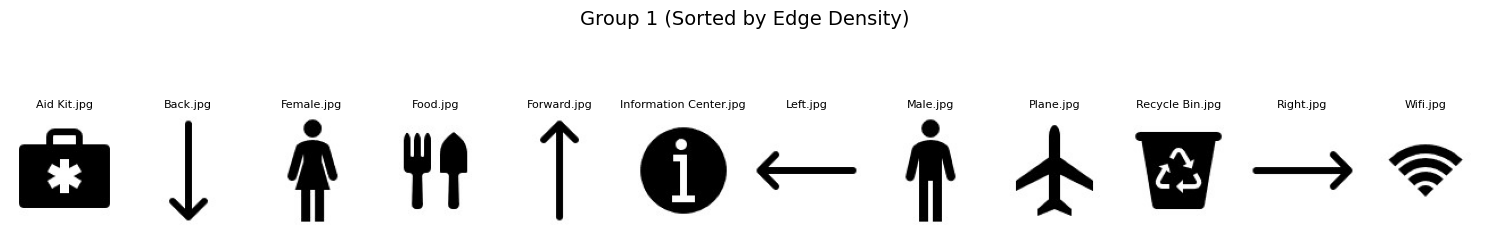

Complexity Metrics for Group 1


Filename  Edge Density   H Sym   V Sym  Complexity
0              Aid Kit.jpg        0.0540  0.9996  0.7795      0.0540
1                 Back.jpg        0.0292  0.9993  0.9503      0.0292
2               Female.jpg        0.0445  0.9954  0.8943      0.0445
3                 Food.jpg        0.0460  0.9527  0.8173      0.0460
4              Forward.jpg        0.0291  0.9991  0.9505      0.0291
5   Information Center.jpg        0.0474  0.9829  0.9668      0.0474
6                 Left.jpg        0.0291  0.9503  0.9993      0.0291
7                 Male.jpg        0.0445  0.9985  0.8748      0.0445
8                Plane.jpg        0.0405  0.9996  0.8646      0.0405
9          Recycle Bin.jpg        0.0553  0.9703  0.8327      0.0553
10               Right.jpg        0.0291  0.9505  0.9987      0.0291
11                Wifi.jpg        0.0464  0.9972  0.8600      0.0464

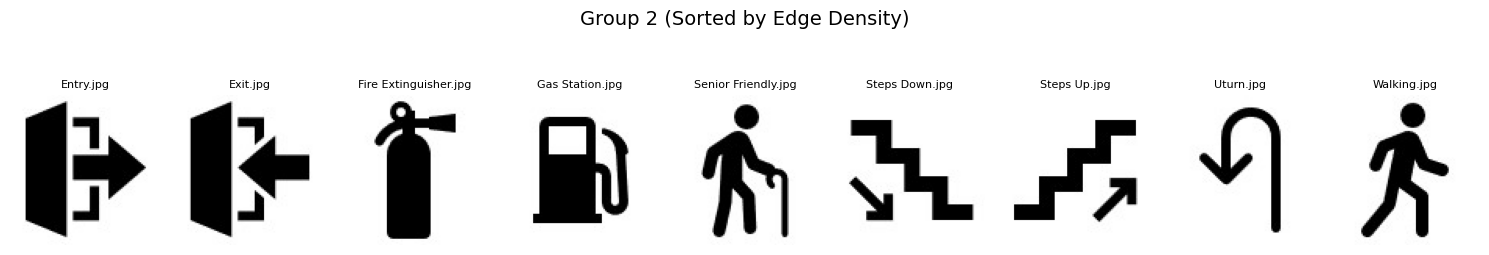

Complexity Metrics for Group 2


Filename  Edge Density   H Sym   V Sym  Complexity
0              Entry.jpg        0.0559  0.6332  0.9418      0.0559
1               Exit.jpg        0.0545  0.6020  0.9449      0.0545
2  Fire Extinguisher.jpg        0.0386  0.8181  0.8819      0.0386
3        Gas Station.jpg        0.0539  0.8099  0.8355      0.0539
4    Senior Friendly.jpg        0.0541  0.7585  0.8184      0.0541
5         Steps Down.jpg        0.0439  0.7721  0.7847      0.0439
6           Steps Up.jpg        0.0430  0.7420  0.7420      0.0430
7              Uturn.jpg        0.0429  0.8088  0.8878      0.0429
8            Walking.jpg        0.0458  0.8455  0.8134      0.0458

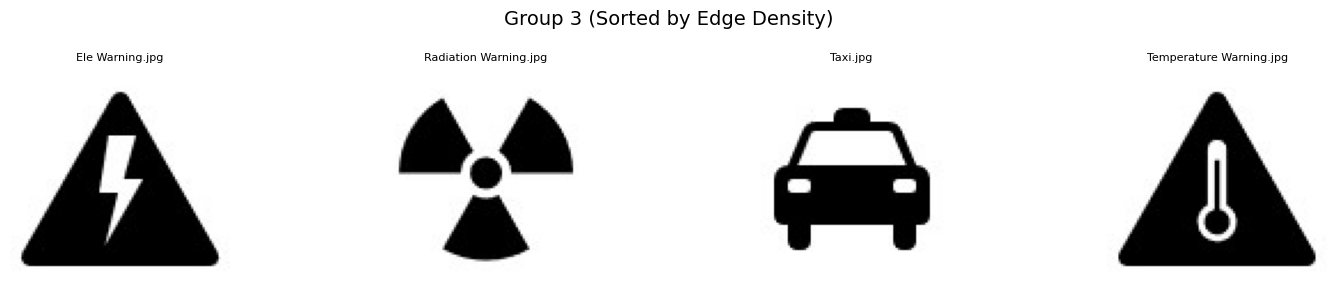

Complexity Metrics for Group 3


Filename  Edge Density   H Sym   V Sym  Complexity
0          Ele Warning.jpg        0.0490  0.9742  0.6118      0.0490
1    Radiation Warning.jpg        0.0456  0.9991  0.5938      0.0456
2                 Taxi.jpg        0.0456  0.9998  0.7020      0.0456
3  Temperature Warning.jpg        0.0558  0.9987  0.6146      0.0558

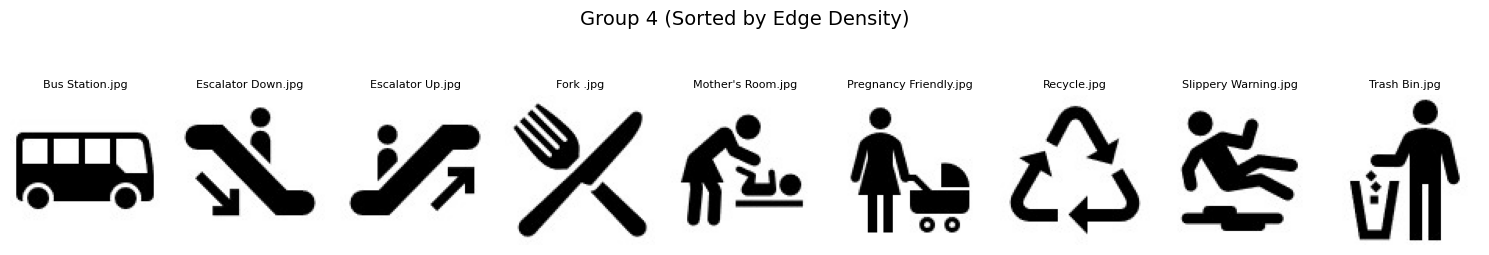

Complexity Metrics for Group 4


Filename  Edge Density   H Sym   V Sym  Complexity
0         Bus Station.jpg        0.0712  0.8770  0.7185      0.0712
1      Escalator Down.jpg        0.0553  0.7144  0.7148      0.0553
2        Escalator Up.jpg        0.0551  0.7201  0.7374      0.0551
3               Fork .jpg        0.0911  0.7895  0.7483      0.0911
4       Mother's Room.jpg        0.0647  0.7322  0.7370      0.0647
5  Pregnancy Friendly.jpg        0.0686  0.6823  0.7331      0.0686
6             Recycle.jpg        0.0637  0.9043  0.6929      0.0637
7    Slippery Warning.jpg        0.0650  0.7669  0.6905      0.0650
8           Trash Bin.jpg        0.0712  0.6541  0.7400      0.0712

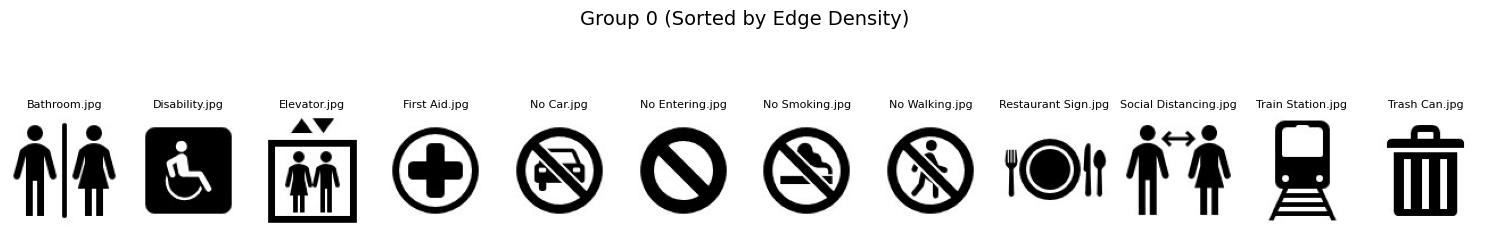

Complexity Metrics for Group 0


Filename  Edge Density   H Sym   V Sym  Complexity
0            Bathroom.jpg        0.0979  0.9642  0.8314      0.0979
1          Disability.jpg        0.0658  0.8952  0.9043      0.0658
2            Elevator.jpg        0.1209  0.9614  0.6970      0.1209
3           First Aid.jpg        0.0751  0.9983  0.9978      0.0751
4              No Car.jpg        0.0931  0.9286  0.9047      0.0931
5         No Entering.jpg        0.0611  0.8954  0.8950      0.0611
6          No Smoking.jpg        0.0869  0.9115  0.8754      0.0869
7          No Walking.jpg        0.0901  0.8989  0.8906      0.0901
8     Restaurant Sign.jpg        0.0876  0.7986  0.8950      0.0876
9   Social Distancing.jpg        0.0895  0.9720  0.7871      0.0895
10      Train Station.jpg        0.0743  0.9989  0.7832      0.0743
11          Trash Can.jpg        0.0773  0.9996  0.8164      0.0773

In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from PIL import Image

# --- Step 1: Compute metrics (NO entropy) ---
def compute_metrics(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape

    edges = cv2.Canny(image, 100, 200)
    edge_density = np.sum(edges > 0) / (height * width)

    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    flipped_h = cv2.flip(binary, 1)
    h_sym = 1 - np.mean(np.abs(binary.astype(np.float32) - flipped_h.astype(np.float32)) / 255)

    flipped_v = cv2.flip(binary, 0)
    v_sym = 1 - np.mean(np.abs(binary.astype(np.float32) - flipped_v.astype(np.float32)) / 255)

    return [edge_density, h_sym, v_sym]  # Removed entropy

# --- Step 2: Load and normalize ---
def load_and_normalize(folder_path):
    files = []
    metrics = []
    for f in os.listdir(folder_path):
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif')):
            try:
                path = os.path.join(folder_path, f)
                m = compute_metrics(path)
                files.append(f)
                metrics.append(m)
            except Exception as e:
                print(f"Failed to process {f}: {e}")
    metrics = np.array(metrics)
    scaler = StandardScaler()
    metrics_scaled = scaler.fit_transform(metrics)
    return files, metrics, metrics_scaled

# --- Step 3: Clustering with distance threshold ---
def cluster_by_threshold(files, metrics_scaled, threshold):
    clustering = AgglomerativeClustering(distance_threshold=threshold, n_clusters=None)
    labels = clustering.fit_predict(metrics_scaled)

    groups = {}
    for file, label in zip(files, labels):
        groups.setdefault(label, []).append(file)
    return groups

# --- Step 4: Rank groups by average edge density only ---
def sort_groups_by_complexity(groups, metrics, files):
    group_scores = []
    for group_id, image_list in groups.items():
        group_idxs = [files.index(f) for f in image_list]
        group_metrics = np.array([metrics[i] for i in group_idxs])
        complexity_score = np.mean(group_metrics[:, 0])  # edge_density only
        group_scores.append((group_id, complexity_score))
    
    group_scores.sort(key=lambda x: x[1])  # from easiest to hardest
    sorted_groups = [group_id for group_id, _ in group_scores]
    return sorted_groups

# --- Step 5: Display images + table (NO entropy) ---
def display_sorted_groups(groups, sorted_group_ids, folder_path, metrics, files):
    for group_id in sorted_group_ids:
        image_list = groups[group_id]
        group_idxs = [files.index(f) for f in image_list]
        group_metrics = [metrics[i] for i in group_idxs]

        # Display images
        plt.figure(figsize=(15, 3))
        for idx, fname in enumerate(image_list):
            img = Image.open(os.path.join(folder_path, fname)).convert('RGB')
            plt.subplot(1, len(image_list), idx + 1)
            plt.imshow(img)
            plt.title(fname, fontsize=8)
            plt.axis('off')
        plt.suptitle(f"Group {group_id} (Sorted by Edge Density)", fontsize=14)
        plt.tight_layout()
        plt.show()

        # Display metrics table
        columns = ['Filename', 'Edge Density', 'H Sym', 'V Sym', 'Complexity']
        table_data = []
        for fname, m in zip(image_list, group_metrics):
            table_data.append([
                fname,
                round(m[0], 4),
                round(m[1], 4),
                round(m[2], 4),
                round(m[0], 4)  # complexity = edge_density only
            ])

        df = pd.DataFrame(table_data, columns=columns)
        print(f"Complexity Metrics for Group {group_id}")
        display(df)

# --- Run the full pipeline ---
folder_path = r'C:\Users\localadmin\OneDrive - Johns Hopkins\EVA_WST\icons'  # CHANGE IF NEEDED

files, metrics, metrics_scaled = load_and_normalize(folder_path)
groups = cluster_by_threshold(files, metrics_scaled, threshold=4)
sorted_group_ids = sort_groups_by_complexity(groups, metrics, files)
display_sorted_groups(groups, sorted_group_ids, folder_path, metrics, files)


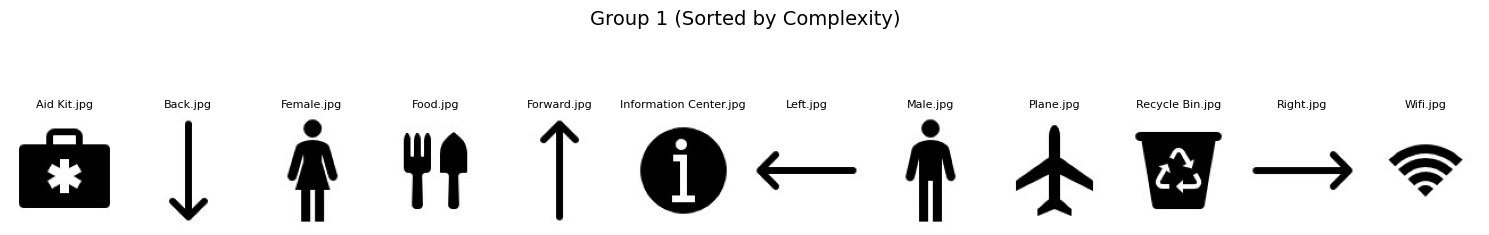

Complexity Metrics for Group 1


Filename  Edge Density  H Symmetry  V Symmetry  Complexity
0              Aid Kit.jpg        0.0540      0.9996      0.7795      0.2750
1                 Back.jpg        0.0292      0.9993      0.9503      0.0795
2               Female.jpg        0.0445      0.9954      0.8943      0.1547
3                 Food.jpg        0.0460      0.9527      0.8173      0.2760
4              Forward.jpg        0.0291      0.9991      0.9505      0.0794
5   Information Center.jpg        0.0474      0.9829      0.9668      0.0978
6                 Left.jpg        0.0291      0.9503      0.9993      0.0794
7                 Male.jpg        0.0445      0.9985      0.8748      0.1712
8                Plane.jpg        0.0405      0.9996      0.8646      0.1763
9          Recycle Bin.jpg        0.0553      0.9703      0.8327      0.2524
10               Right.jpg        0.0291      0.9505      0.9987      0.0799
11                Wifi.jpg        0.0464      0.9972      0.8600      0.1892

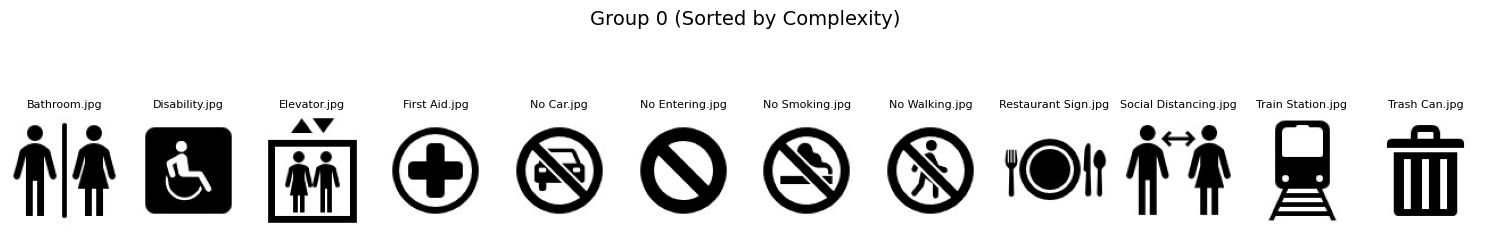

Complexity Metrics for Group 0


Filename  Edge Density  H Symmetry  V Symmetry  Complexity
0            Bathroom.jpg        0.0979      0.9642      0.8314      0.3023
1          Disability.jpg        0.0658      0.8952      0.9043      0.2663
2            Elevator.jpg        0.1209      0.9614      0.6970      0.4625
3           First Aid.jpg        0.0751      0.9983      0.9978      0.0790
4              No Car.jpg        0.0931      0.9286      0.9047      0.2598
5         No Entering.jpg        0.0611      0.8954      0.8950      0.2707
6          No Smoking.jpg        0.0869      0.9115      0.8754      0.3000
7          No Walking.jpg        0.0901      0.8989      0.8906      0.3006
8     Restaurant Sign.jpg        0.0876      0.7986      0.8950      0.3940
9   Social Distancing.jpg        0.0895      0.9720      0.7871      0.3304
10      Train Station.jpg        0.0743      0.9989      0.7832      0.2922
11          Trash Can.jpg        0.0773      0.9996      0.8164      0.2613

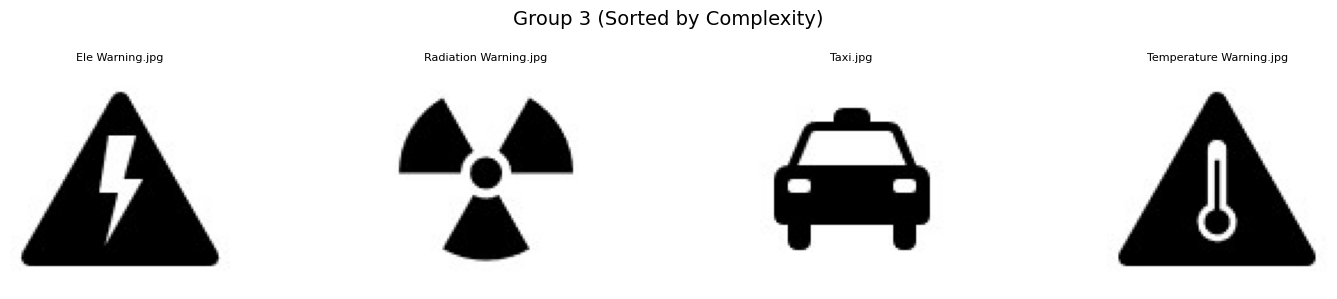

Complexity Metrics for Group 3


Filename  Edge Density  H Symmetry  V Symmetry  Complexity
0          Ele Warning.jpg        0.0490      0.9742      0.6118      0.4631
1    Radiation Warning.jpg        0.0456      0.9991      0.5938      0.4527
2                 Taxi.jpg        0.0456      0.9998      0.7020      0.3437
3  Temperature Warning.jpg        0.0558      0.9987      0.6146      0.4425

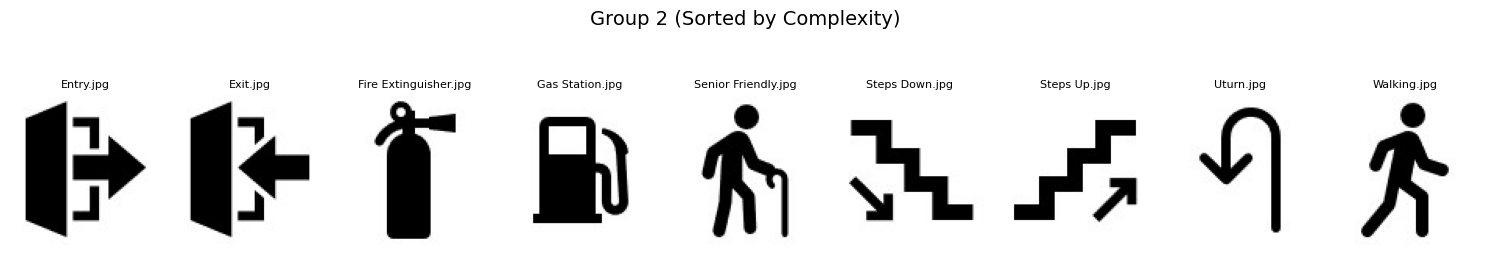

Complexity Metrics for Group 2


Filename  Edge Density  H Symmetry  V Symmetry  Complexity
0              Entry.jpg        0.0559      0.6332      0.9418      0.4808
1               Exit.jpg        0.0545      0.6020      0.9449      0.5076
2  Fire Extinguisher.jpg        0.0386      0.8181      0.8819      0.3385
3        Gas Station.jpg        0.0539      0.8099      0.8355      0.4085
4    Senior Friendly.jpg        0.0541      0.7585      0.8184      0.4773
5         Steps Down.jpg        0.0439      0.7721      0.7847      0.4871
6           Steps Up.jpg        0.0430      0.7420      0.7420      0.5590
7              Uturn.jpg        0.0429      0.8088      0.8878      0.3462
8            Walking.jpg        0.0458      0.8455      0.8134      0.3869

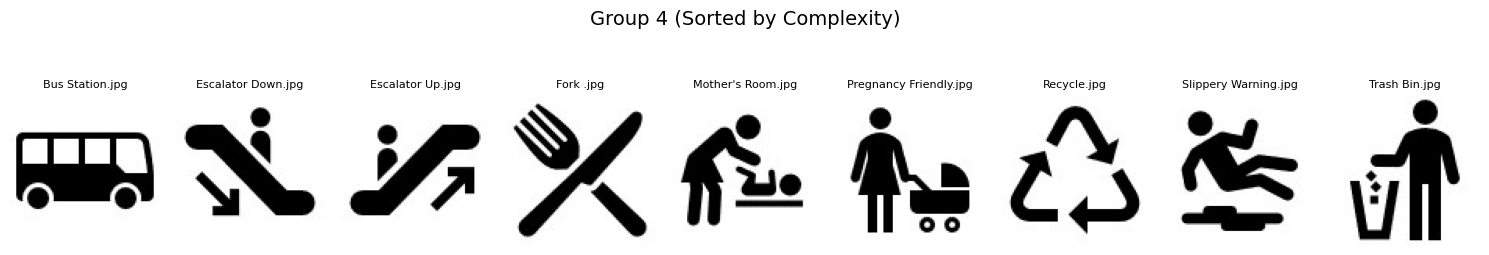

Complexity Metrics for Group 4


Filename  Edge Density  H Symmetry  V Symmetry  Complexity
0         Bus Station.jpg        0.0712      0.8770      0.7185      0.4757
1      Escalator Down.jpg        0.0553      0.7144      0.7148      0.6261
2        Escalator Up.jpg        0.0551      0.7201      0.7374      0.5977
3               Fork .jpg        0.0911      0.7895      0.7483      0.5534
4       Mother's Room.jpg        0.0647      0.7322      0.7370      0.5955
5  Pregnancy Friendly.jpg        0.0686      0.6823      0.7331      0.6532
6             Recycle.jpg        0.0637      0.9043      0.6929      0.4665
7    Slippery Warning.jpg        0.0650      0.7669      0.6905      0.6075
8           Trash Bin.jpg        0.0712      0.6541      0.7400      0.6771

In [21]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from PIL import Image

# --- Step 1: Compute metrics (edge + symmetries only) ---
def compute_metrics(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape

    edges = cv2.Canny(image, 100, 200)
    edge_density = np.sum(edges > 0) / (height * width)

    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    flipped_h = cv2.flip(binary, 1)
    h_sym = 1 - np.mean(np.abs(binary.astype(np.float32) - flipped_h.astype(np.float32)) / 255)

    flipped_v = cv2.flip(binary, 0)
    v_sym = 1 - np.mean(np.abs(binary.astype(np.float32) - flipped_v.astype(np.float32)) / 255)

    return [edge_density, h_sym, v_sym]

# --- Step 2: Load and normalize ---
def load_and_normalize(folder_path):
    files = []
    metrics = []
    for f in os.listdir(folder_path):
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif')):
            try:
                path = os.path.join(folder_path, f)
                m = compute_metrics(path)
                files.append(f)
                metrics.append(m)
            except Exception as e:
                print(f"Failed to process {f}: {e}")
    metrics = np.array(metrics)
    scaler = StandardScaler()
    metrics_scaled = scaler.fit_transform(metrics)
    return files, metrics, metrics_scaled

# --- Step 3: Clustering with distance threshold ---
def cluster_by_threshold(files, metrics_scaled, threshold):
    clustering = AgglomerativeClustering(distance_threshold=threshold, n_clusters=None)
    labels = clustering.fit_predict(metrics_scaled)

    groups = {}
    for file, label in zip(files, labels):
        groups.setdefault(label, []).append(file)
    return groups

# --- Step 4: Rank groups by average complexity ---
def sort_groups_by_complexity(groups, metrics, files):
    group_scores = []
    for group_id, image_list in groups.items():
        group_idxs = [files.index(f) for f in image_list]
        group_metrics = np.array([metrics[i] for i in group_idxs])

        # Complexity = more edges + less symmetry
        complexity = np.mean(group_metrics[:, 0] + (1 - group_metrics[:, 1]) + (1 - group_metrics[:, 2]))
        group_scores.append((group_id, complexity))
    
    group_scores.sort(key=lambda x: x[1])  # from easiest to hardest
    sorted_groups = [group_id for group_id, _ in group_scores]
    return sorted_groups

# --- Step 5: Display images + complexity table ---
def display_sorted_groups(groups, sorted_group_ids, folder_path, metrics, files):
    for group_id in sorted_group_ids:
        image_list = groups[group_id]
        group_idxs = [files.index(f) for f in image_list]
        group_metrics = [metrics[i] for i in group_idxs]

        # Display image panel
        plt.figure(figsize=(15, 3))
        for idx, fname in enumerate(image_list):
            img = Image.open(os.path.join(folder_path, fname)).convert('RGB')
            plt.subplot(1, len(image_list), idx + 1)
            plt.imshow(img)
            plt.title(fname, fontsize=8)
            plt.axis('off')
        plt.suptitle(f"Group {group_id} (Sorted by Complexity)", fontsize=14)
        plt.tight_layout()
        plt.show()

        # Display metrics table
        columns = ['Filename', 'Edge Density', 'H Symmetry', 'V Symmetry', 'Complexity']
        table_data = []
        for fname, m in zip(image_list, group_metrics):
            complexity = round(m[0] + (1 - m[1]) + (1 - m[2]), 4)
            table_data.append([
                fname,
                round(m[0], 4),
                round(m[1], 4),
                round(m[2], 4),
                complexity
            ])

        df = pd.DataFrame(table_data, columns=columns)
        print(f"Complexity Metrics for Group {group_id}")
        display(df)

# --- Run ---
folder_path = r'C:\Users\localadmin\OneDrive - Johns Hopkins\EVA_WST\icons'  # <--- Adjust if needed
files, metrics, metrics_scaled = load_and_normalize(folder_path)
groups = cluster_by_threshold(files, metrics_scaled, threshold=4)
sorted_group_ids = sort_groups_by_complexity(groups, metrics, files)
display_sorted_groups(groups, sorted_group_ids, folder_path, metrics, files)


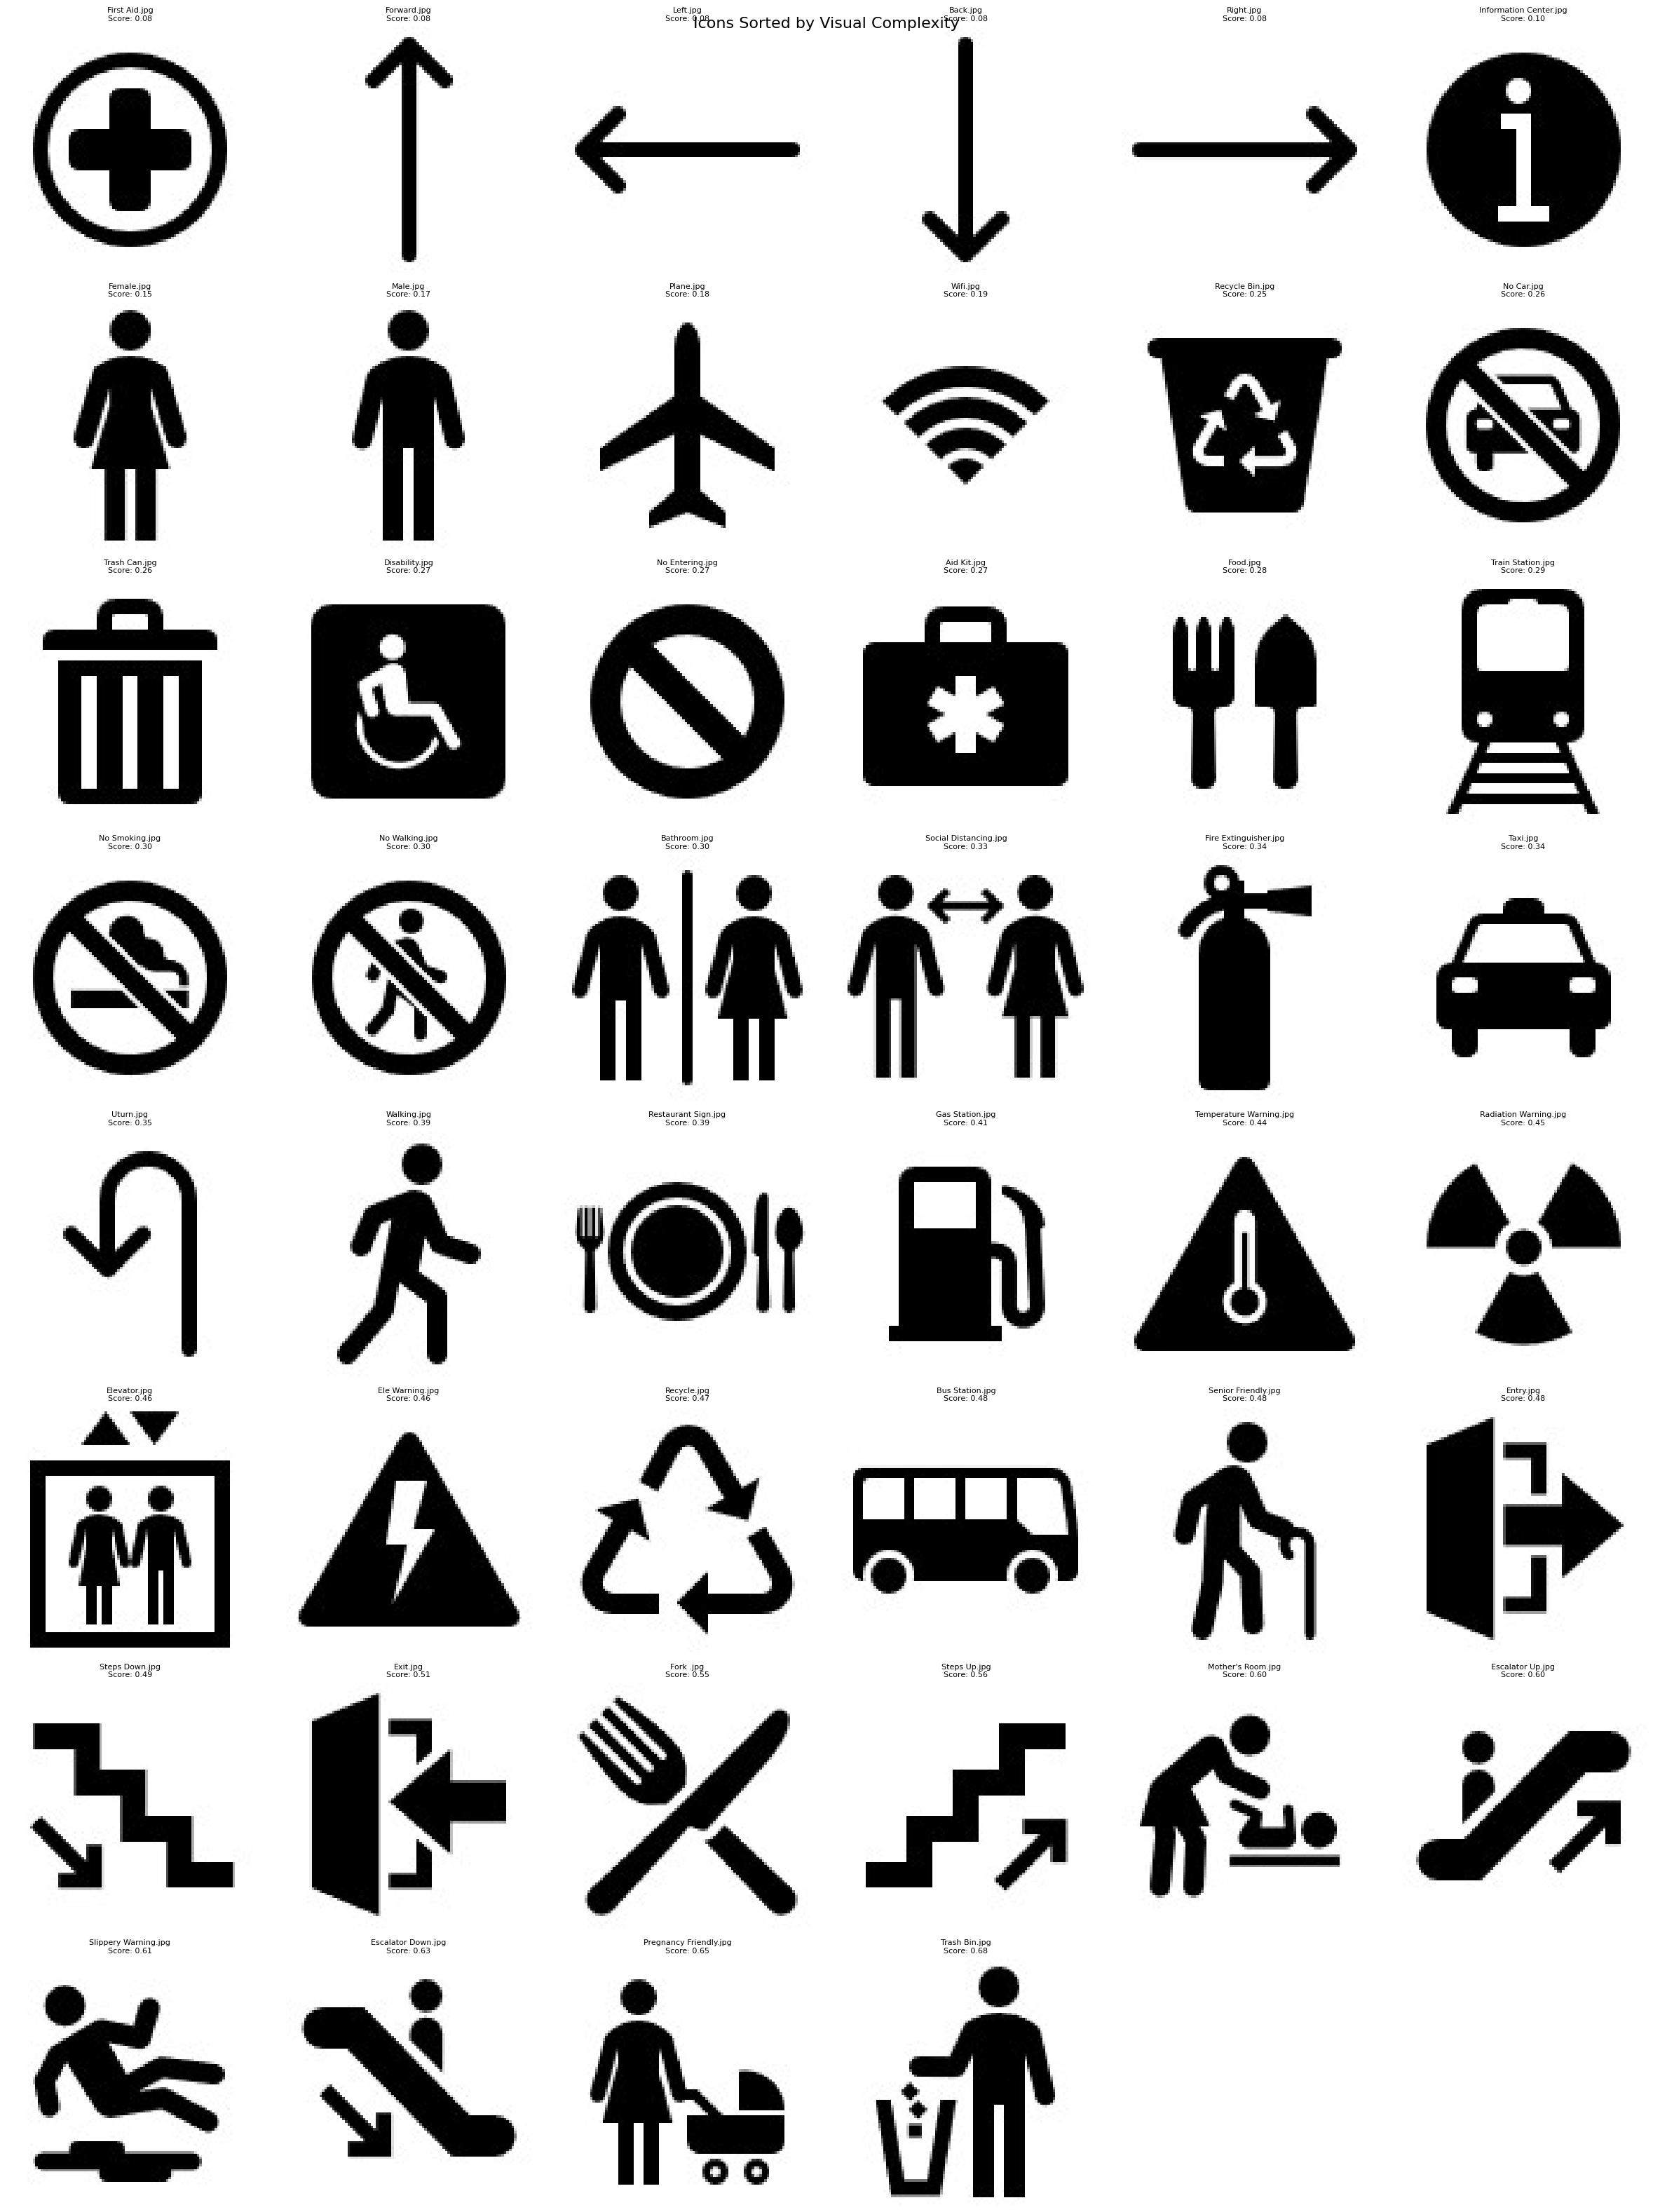

Sorted Complexity Table:


Filename  Edge Density  H Symmetry  V Symmetry  Complexity
0             First Aid.jpg        0.0751      0.9983      0.9978      0.0790
1               Forward.jpg        0.0291      0.9991      0.9505      0.0794
2                  Left.jpg        0.0291      0.9503      0.9993      0.0794
3                  Back.jpg        0.0292      0.9993      0.9503      0.0795
4                 Right.jpg        0.0291      0.9505      0.9987      0.0799
5    Information Center.jpg        0.0474      0.9829      0.9668      0.0978
6                Female.jpg        0.0445      0.9954      0.8943      0.1547
7                  Male.jpg        0.0445      0.9985      0.8748      0.1712
8                 Plane.jpg        0.0405      0.9996      0.8646      0.1763
9                  Wifi.jpg        0.0464      0.9972      0.8600      0.1892
10          Recycle Bin.jpg        0.0553      0.9703      0.8327      0.2524
11               No Car.jpg        0.0931      0.9286      0.9047      0.2598
12            Trash Can.jpg        0.0773      0.9996      0.8164      0.2613
13           Disability.jpg        0.0658      0.8952      0.9043      0.2663
14          No Entering.jpg        0.0611      0.8954      0.8950      0.2707
15              Aid Kit.jpg        0.0540      0.9996      0.7795      0.2750
16                 Food.jpg        0.0460      0.9527      0.8173      0.2760
17        Train Station.jpg        0.0743      0.9989      0.7832      0.2922
18           No Smoking.jpg        0.0869      0.9115      0.8754      0.3000
19           No Walking.jpg        0.0901      0.8989      0.8906      0.3006
20             Bathroom.jpg        0.0979      0.9642      0.8314      0.3023
21    Social Distancing.jpg        0.0895      0.9720      0.7871      0.3304
22    Fire Extinguisher.jpg        0.0386      0.8181      0.8819      0.3385
23                 Taxi.jpg        0.0456      0.9998      0.7020      0.3437
24                Uturn.jpg        0.0429      0.8088      0.8878      0.3462
25              Walking.jpg        0.0458      0.8455      0.8134      0.3869
26      Restaurant Sign.jpg        0.0876      0.7986      0.8950      0.3940
27          Gas Station.jpg        0.0539      0.8099      0.8355      0.4085
28  Temperature Warning.jpg        0.0558      0.9987      0.6146      0.4425
29    Radiation Warning.jpg        0.0456      0.9991      0.5938      0.4527
30             Elevator.jpg        0.1209      0.9614      0.6970      0.4625
31          Ele Warning.jpg        0.0490      0.9742      0.6118      0.4631
32              Recycle.jpg        0.0637      0.9043      0.6929      0.4665
33          Bus Station.jpg        0.0712      0.8770      0.7185      0.4757
34      Senior Friendly.jpg        0.0541      0.7585      0.8184      0.4773
35                Entry.jpg        0.0559      0.6332      0.9418      0.4808
36           Steps Down.jpg        0.0439      0.7721      0.7847      0.4871
37                 Exit.jpg        0.0545      0.6020      0.9449      0.5076
38                Fork .jpg        0.0911      0.7895      0.7483      0.5534
39             Steps Up.jpg        0.0430      0.7420      0.7420      0.5590
40        Mother's Room.jpg        0.0647      0.7322      0.7370      0.5955
41         Escalator Up.jpg        0.0551      0.7201      0.7374      0.5977
42     Slippery Warning.jpg        0.0650      0.7669      0.6905      0.6075
43       Escalator Down.jpg        0.0553      0.7144      0.7148      0.6261
44   Pregnancy Friendly.jpg        0.0686      0.6823      0.7331      0.6532
45            Trash Bin.jpg        0.0712      0.6541      0.7400      0.6771

In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from PIL import Image

# --- Step 1: Compute metrics (edge + symmetry only) ---
def compute_metrics(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape

    edges = cv2.Canny(image, 100, 200)
    edge_density = np.sum(edges > 0) / (height * width)

    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    flipped_h = cv2.flip(binary, 1)
    h_sym = 1 - np.mean(np.abs(binary.astype(np.float32) - flipped_h.astype(np.float32)) / 255)

    flipped_v = cv2.flip(binary, 0)
    v_sym = 1 - np.mean(np.abs(binary.astype(np.float32) - flipped_v.astype(np.float32)) / 255)

    return [edge_density, h_sym, v_sym]

# --- Step 2: Load and compute metrics for all images ---
def load_metrics(folder_path):
    files = []
    metrics = []
    for f in os.listdir(folder_path):
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif')):
            try:
                path = os.path.join(folder_path, f)
                m = compute_metrics(path)
                files.append(f)
                metrics.append(m)
            except Exception as e:
                print(f"Failed to process {f}: {e}")
    return files, metrics

# --- Step 3: Compute complexity and sort all images ---
def sort_by_complexity(files, metrics):
    complexities = [m[0] + (1 - m[1]) + (1 - m[2]) for m in metrics]
    data = list(zip(files, metrics, complexities))
    data.sort(key=lambda x: x[2])  # sort by complexity (ascending)
    return data

# --- Step 4: Display images and complexity table ---
def display_sorted_images(data, folder_path):
    # Display all images in a single row (or in chunks)
    num = len(data)
    cols = min(num, 6)
    rows = int(np.ceil(num / cols))

    plt.figure(figsize=(4 * cols, 4 * rows))
    for idx, (fname, metrics, complexity) in enumerate(data):
        img = Image.open(os.path.join(folder_path, fname)).convert('RGB')
        plt.subplot(rows, cols, idx + 1)
        plt.imshow(img)
        plt.title(f"{fname}\nScore: {complexity:.2f}", fontsize=8)
        plt.axis('off')
    plt.suptitle("Icons Sorted by Visual Complexity", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Display table
    table_data = []
    for fname, m, complexity in data:
        table_data.append([
            fname,
            round(m[0], 4),
            round(m[1], 4),
            round(m[2], 4),
            round(complexity, 4)
        ])
    df = pd.DataFrame(table_data, columns=['Filename', 'Edge Density', 'H Symmetry', 'V Symmetry', 'Complexity'])
    print("Sorted Complexity Table:")
    display(df)

# --- Run all ---
folder_path = r'C:\Users\localadmin\OneDrive - Johns Hopkins\EVA_WST\icons'  # <-- update if needed
files, metrics = load_metrics(folder_path)
sorted_data = sort_by_complexity(files, metrics)
display_sorted_images(sorted_data, folder_path)


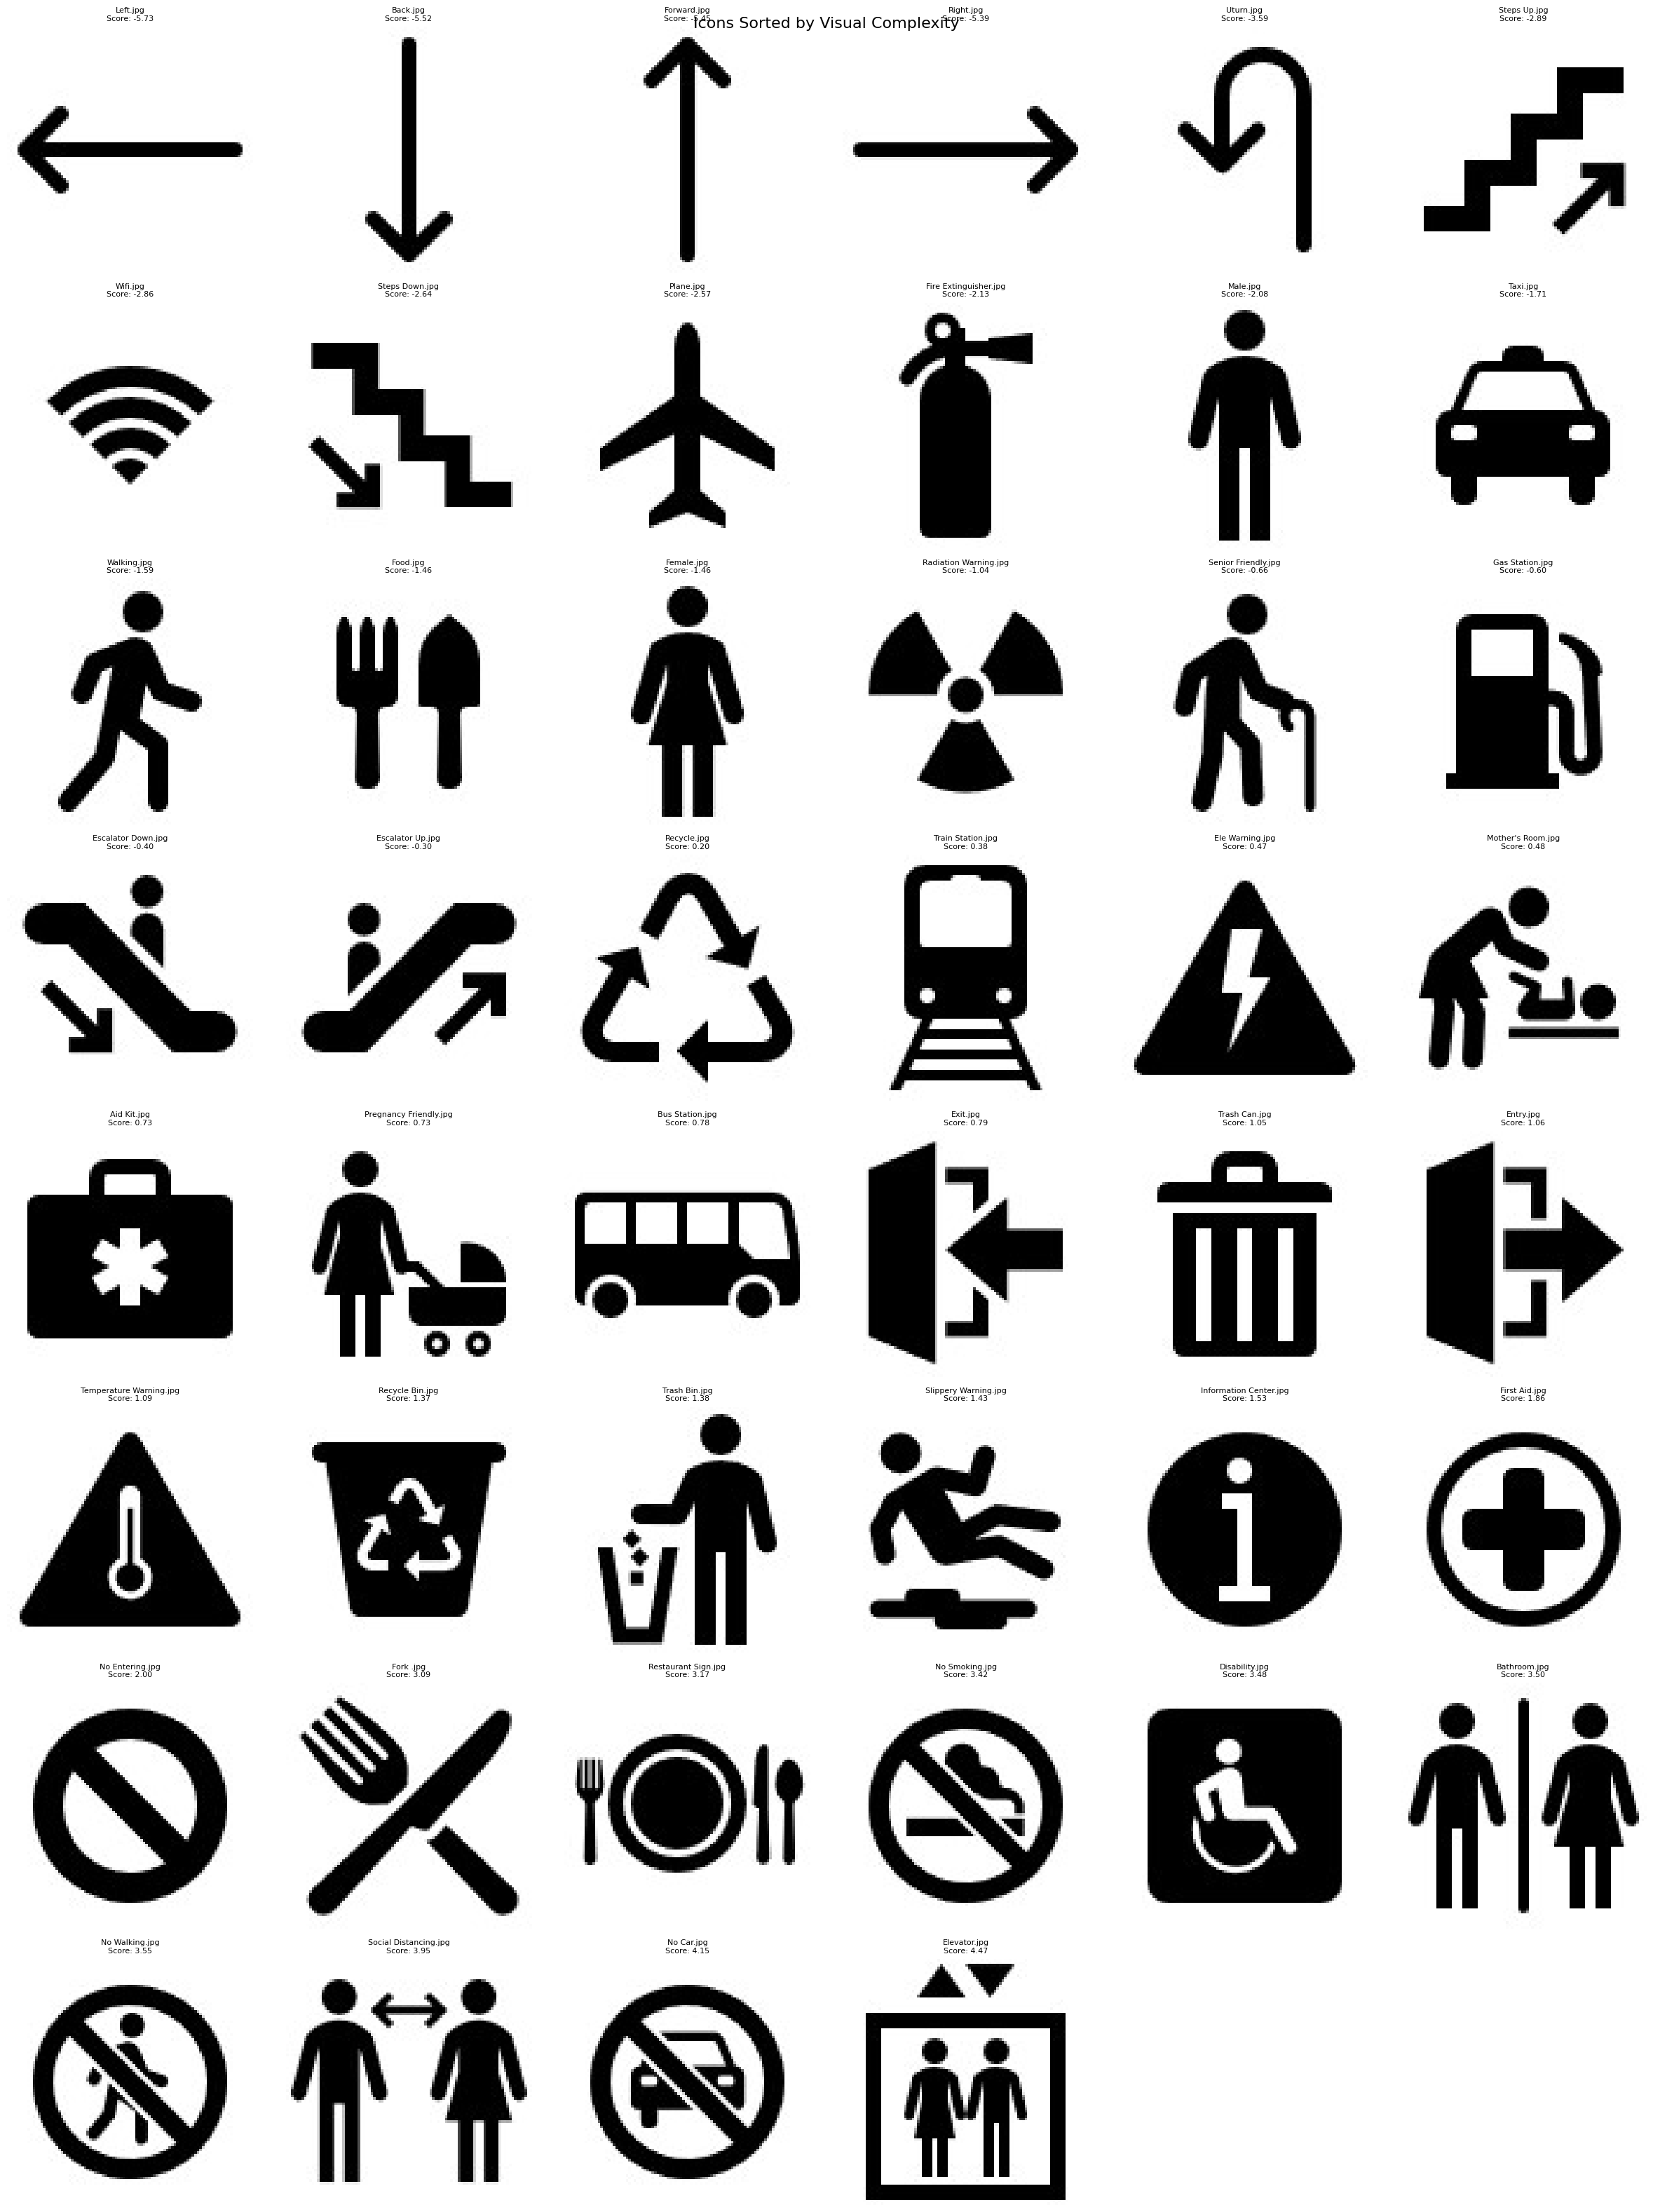

Sorted Complexity Table:


Filename  Edge Density  Entropy  Pixel Density  Contrast  \
0                  Left.jpg        0.0291   0.9278         0.0875     255.0   
1                  Back.jpg        0.0292   1.0318         0.0889     255.0   
2               Forward.jpg        0.0291   1.0382         0.0948     255.0   
3                 Right.jpg        0.0291   1.0719         0.0942     255.0   
4                 Uturn.jpg        0.0429   1.4836         0.1311     255.0   
5              Steps Up.jpg        0.0430   1.5464         0.1909     255.0   
6                  Wifi.jpg        0.0464   1.6545         0.1559     255.0   
7            Steps Down.jpg        0.0439   1.6231         0.1973     255.0   
8                 Plane.jpg        0.0405   1.7819         0.1905     255.0   
9     Fire Extinguisher.jpg        0.0386   1.6544         0.2704     255.0   
10                 Male.jpg        0.0445   1.7435         0.2281     255.0   
11                 Taxi.jpg        0.0456   1.7693         0.2559     255.0   
12              Walking.jpg        0.0458   2.0453         0.2146     255.0   
13                 Food.jpg        0.0460   1.9781         0.2393     255.0   
14               Female.jpg        0.0445   1.9833         0.2466     255.0   
15    Radiation Warning.jpg        0.0456   2.0611         0.2689     255.0   
16      Senior Friendly.jpg        0.0541   2.2433         0.2295     255.0   
17          Gas Station.jpg        0.0539   1.9186         0.2992     255.0   
18       Escalator Down.jpg        0.0553   2.1544         0.2674     255.0   
19         Escalator Up.jpg        0.0551   2.2127         0.2681     255.0   
20              Recycle.jpg        0.0637   2.4141         0.2373     255.0   
21        Train Station.jpg        0.0743   1.9523         0.2906     255.0   
22          Ele Warning.jpg        0.0490   2.2167         0.3768     255.0   
23        Mother's Room.jpg        0.0647   2.4245         0.2595     255.0   
24              Aid Kit.jpg        0.0540   1.7678         0.4645     255.0   
25   Pregnancy Friendly.jpg        0.0686   2.2615         0.2963     255.0   
26          Bus Station.jpg        0.0712   2.1711         0.3061     255.0   
27                 Exit.jpg        0.0545   2.2402         0.3778     255.0   
28            Trash Can.jpg        0.0773   1.9822         0.3397     255.0   
29                Entry.jpg        0.0559   2.3153         0.3840     255.0   
30  Temperature Warning.jpg        0.0558   2.3057         0.3895     255.0   
31          Recycle Bin.jpg        0.0553   2.3915         0.4040     255.0   
32            Trash Bin.jpg        0.0712   2.4702         0.3102     255.0   
33     Slippery Warning.jpg        0.0650   2.6320         0.3153     255.0   
34   Information Center.jpg        0.0474   2.3817         0.4632     255.0   
35            First Aid.jpg        0.0751   2.5842         0.3180     255.0   
36          No Entering.jpg        0.0611   2.7745         0.3666     255.0   
37                Fork .jpg        0.0911   2.8220         0.3183     255.0   
38      Restaurant Sign.jpg        0.0876   2.8783         0.3337     255.0   
39           No Smoking.jpg        0.0869   2.9673         0.3455     255.0   
40           Disability.jpg        0.0658   2.3583         0.5757     255.0   
41             Bathroom.jpg        0.0979   2.5560         0.3770     255.0   
42           No Walking.jpg        0.0901   3.0175         0.3331     255.0   
43    Social Distancing.jpg        0.0895   3.0118         0.3781     255.0   
44               No Car.jpg        0.0931   3.1327         0.3570     255.0   
45             Elevator.jpg        0.1209   2.4896         0.3735     255.0   

    Contours  Complexity Score  
0          1           -5.7291  
1          1           -5.5160  
2          1           -5.4513  
3          1           -5.3947  
4          1           -3.5918  
5          1           -2.8886  
6          1           -2.8558  
7          1           -2.6354  
8       

In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler

# --- Step 1: Compute complexity metrics ---
def compute_metrics(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape
    total_pixels = height * width

    # Edge density (Canny)
    edges = cv2.Canny(image, 100, 200)
    edge_density = np.sum(edges > 0) / total_pixels

    # Entropy
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_norm = hist / hist.sum()
    entropy = -np.sum(hist_norm * np.log2(hist_norm + 1e-8))

    # Pixel density (non-white pixels)
    pixel_density = np.sum(image < 250) / total_pixels

    # Contrast range
    contrast_range = image.max() - image.min()

    # Number of contours
    _, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    num_contours = len(contours)

    return [edge_density, entropy, pixel_density, contrast_range, num_contours]

# --- Step 2: Load all images and extract metrics ---
def load_metrics(folder_path):
    files = []
    metrics = []
    for f in os.listdir(folder_path):
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif')):
            try:
                path = os.path.join(folder_path, f)
                m = compute_metrics(path)
                files.append(f)
                metrics.append(m)
            except Exception as e:
                print(f"Failed to process {f}: {e}")
    return files, metrics

# --- Step 3: Compute a complexity score and sort ---
def sort_by_complexity(files, metrics):
    metrics = np.array(metrics)
    scaler = StandardScaler()
    scaled = scaler.fit_transform(metrics)

    complexities = np.sum(scaled, axis=1)  # sum across all features
    data = list(zip(files, metrics.tolist(), complexities))
    data.sort(key=lambda x: x[2])  # ascending complexity
    return data

# --- Step 4: Display sorted icons and table ---
def display_sorted(data, folder_path):
    num = len(data)
    cols = min(num, 6)
    rows = int(np.ceil(num / cols))

    # Show images
    plt.figure(figsize=(4 * cols, 4 * rows))
    for idx, (fname, metrics, complexity) in enumerate(data):
        img = Image.open(os.path.join(folder_path, fname)).convert('RGB')
        plt.subplot(rows, cols, idx + 1)
        plt.imshow(img)
        plt.title(f"{fname}\nScore: {complexity:.2f}", fontsize=8)
        plt.axis('off')
    plt.suptitle("Icons Sorted by Visual Complexity", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Show table
    table_data = []
    for fname, m, complexity in data:
        table_data.append([
            fname,
            round(m[0], 4),  # edge density
            round(m[1], 4),  # entropy
            round(m[2], 4),  # pixel density
            round(m[3], 4),  # contrast
            int(m[4]),       # number of contours
            round(complexity, 4)
        ])
    df = pd.DataFrame(table_data, columns=[
        'Filename', 'Edge Density', 'Entropy', 'Pixel Density',
        'Contrast', 'Contours', 'Complexity Score'
    ])
    print("Sorted Complexity Table:")
    display(df)

# --- Run everything ---
folder_path = r'C:\Users\localadmin\OneDrive - Johns Hopkins\EVA_WST\icons'  # ← change if needed

files, metrics = load_metrics(folder_path)
sorted_data = sort_by_complexity(files, metrics)
display_sorted(sorted_data, folder_path)


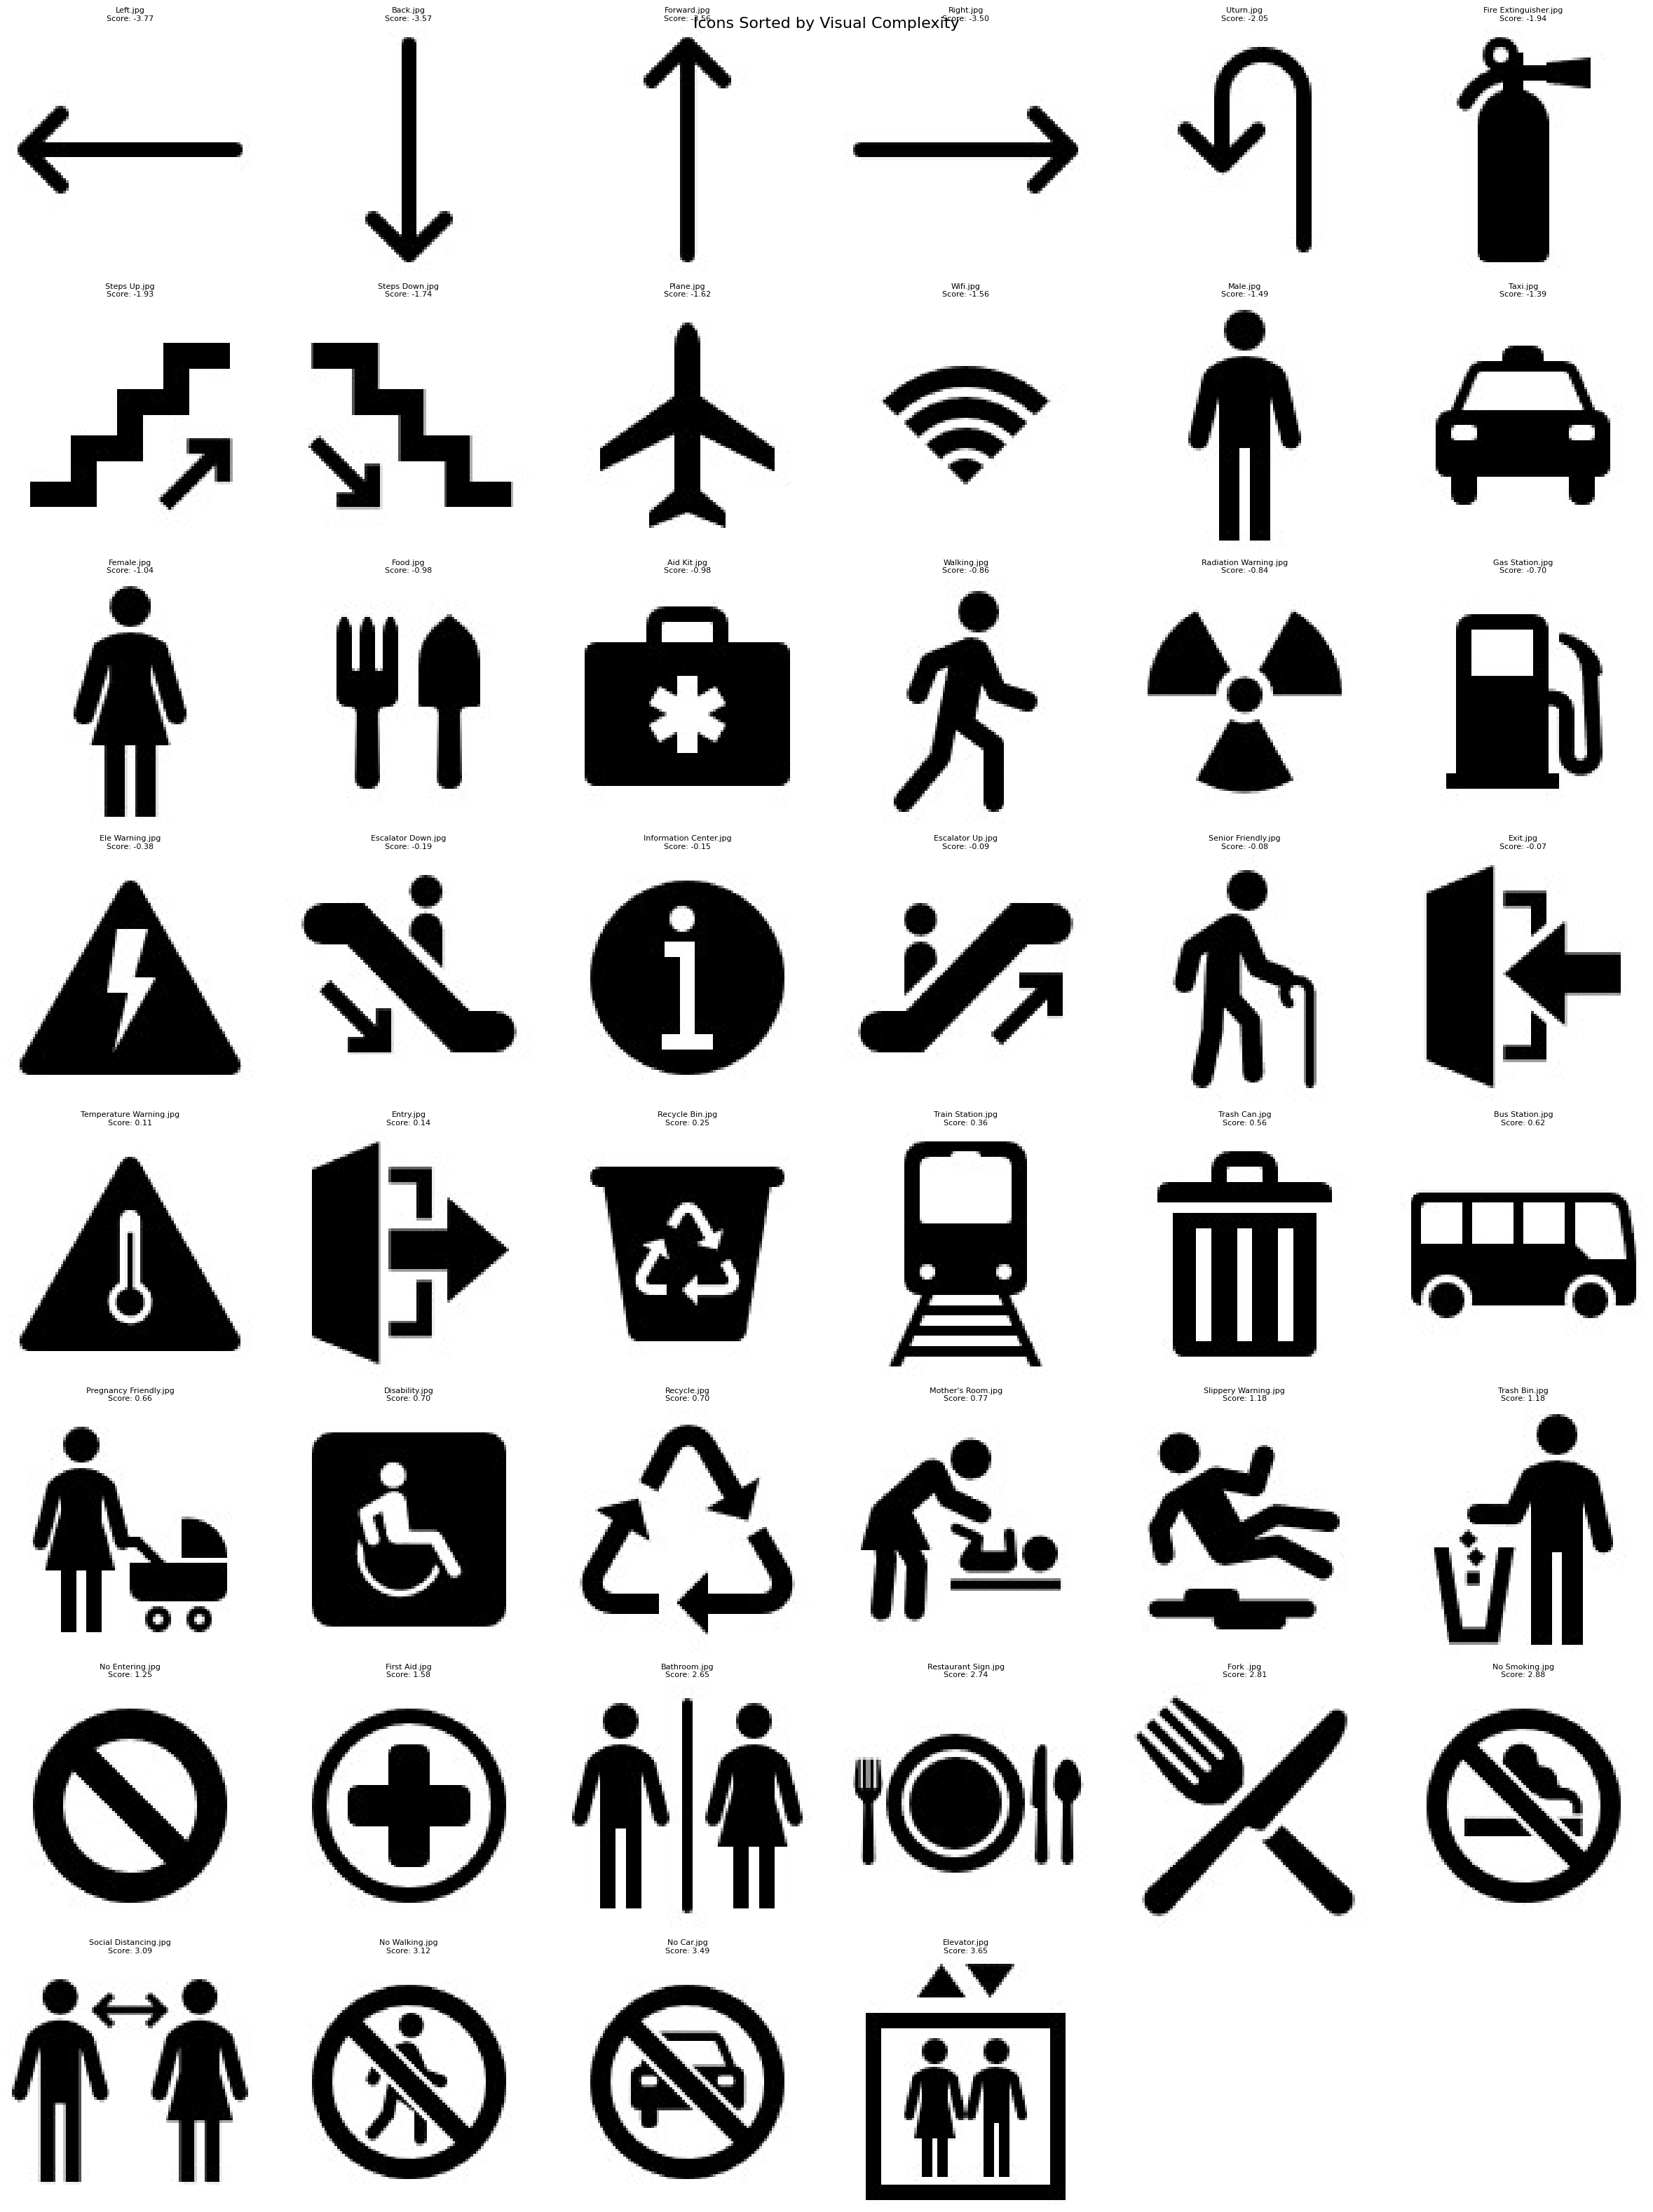

Sorted Complexity Table:


Filename  Edge Density  Entropy  Contrast  Contours  \
0                  Left.jpg        0.0291   0.9278     255.0         1   
1                  Back.jpg        0.0292   1.0318     255.0         1   
2               Forward.jpg        0.0291   1.0382     255.0         1   
3                 Right.jpg        0.0291   1.0719     255.0         1   
4                 Uturn.jpg        0.0429   1.4836     255.0         1   
5     Fire Extinguisher.jpg        0.0386   1.6544     255.0         1   
6              Steps Up.jpg        0.0430   1.5464     255.0         1   
7            Steps Down.jpg        0.0439   1.6231     255.0         1   
8                 Plane.jpg        0.0405   1.7819     255.0         1   
9                  Wifi.jpg        0.0464   1.6545     255.0         1   
10                 Male.jpg        0.0445   1.7435     255.0         1   
11                 Taxi.jpg        0.0456   1.7693     255.0         1   
12               Female.jpg        0.0445   1.9833     255.0         1   
13                 Food.jpg        0.0460   1.9781     255.0         1   
14              Aid Kit.jpg        0.0540   1.7678     255.0         1   
15              Walking.jpg        0.0458   2.0453     255.0         1   
16    Radiation Warning.jpg        0.0456   2.0611     255.0         1   
17          Gas Station.jpg        0.0539   1.9186     255.0         1   
18          Ele Warning.jpg        0.0490   2.2167     255.0         1   
19       Escalator Down.jpg        0.0553   2.1544     255.0         1   
20   Information Center.jpg        0.0474   2.3817     255.0         1   
21         Escalator Up.jpg        0.0551   2.2127     255.0         1   
22      Senior Friendly.jpg        0.0541   2.2433     255.0         1   
23                 Exit.jpg        0.0545   2.2402     255.0         1   
24  Temperature Warning.jpg        0.0558   2.3057     255.0         1   
25                Entry.jpg        0.0559   2.3153     255.0         1   
26          Recycle Bin.jpg        0.0553   2.3915     255.0         1   
27        Train Station.jpg        0.0743   1.9523     255.0         1   
28            Trash Can.jpg        0.0773   1.9822     255.0         1   
29          Bus Station.jpg        0.0712   2.1711     255.0         1   
30   Pregnancy Friendly.jpg        0.0686   2.2615     255.0         1   
31           Disability.jpg        0.0658   2.3583     255.0         1   
32              Recycle.jpg        0.0637   2.4141     255.0         1   
33        Mother's Room.jpg        0.0647   2.4245     255.0         1   
34     Slippery Warning.jpg        0.0650   2.6320     255.0         1   
35            Trash Bin.jpg        0.0712   2.4702     255.0         1   
36          No Entering.jpg        0.0611   2.7745     255.0         1   
37            First Aid.jpg        0.0751   2.5842     255.0         1   
38             Bathroom.jpg        0.0979   2.5560     255.0         1   
39      Restaurant Sign.jpg        0.0876   2.8783     255.0         1   
40                Fork .jpg        0.0911   2.8220     255.0         1   
41           No Smoking.jpg        0.0869   2.9673     255.0         1   
42    Social Distancing.jpg        0.0895   3.0118     255.0         1   
43           No Walking.jpg        0.0901   3.0175     255.0         1   
44               No Car.jpg        0.0931   3.1327     255.0         1   
45             Elevator.jpg        0.1209   2.4896     255.0         1   

    Complexity Score  
0            -3.7686  
1            -3.5692  
2            -3.5625  
3            -3.4996  
4            -2.0548  
5            -1.9436  
6            -1.9322  
7            -1.7411  
8            -1.6152  
9            -1.5602  
10           -1.4898  
11           -1.3883  
12           -1.0421  
13           -0.9773  
14           -0.9758  
15           -0.8624  
16           -0.8436  
17           -0.6996  
18           -0.3827  
19           -0.1902  
20           -0.1545  
21           -0.0920  
22         

In [25]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler

# --- Step 1: Compute complexity metrics ---
def compute_metrics(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape
    total_pixels = height * width

    # Edge density (Canny)
    edges = cv2.Canny(image, 100, 200)
    edge_density = np.sum(edges > 0) / total_pixels

    # Entropy
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_norm = hist / hist.sum()
    entropy = -np.sum(hist_norm * np.log2(hist_norm + 1e-8))

    # Contrast range
    contrast_range = image.max() - image.min()

    # Number of contours
    _, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    num_contours = len(contours)

    return [edge_density, entropy, contrast_range, num_contours]

# --- Step 2: Load all images and extract metrics ---
def load_metrics(folder_path):
    files = []
    metrics = []
    for f in os.listdir(folder_path):
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif')):
            try:
                path = os.path.join(folder_path, f)
                m = compute_metrics(path)
                files.append(f)
                metrics.append(m)
            except Exception as e:
                print(f"Failed to process {f}: {e}")
    return files, metrics

# --- Step 3: Compute a complexity score and sort ---
def sort_by_complexity(files, metrics):
    metrics = np.array(metrics)
    scaler = StandardScaler()
    scaled = scaler.fit_transform(metrics)

    complexities = np.sum(scaled, axis=1)
    data = list(zip(files, metrics.tolist(), complexities))
    data.sort(key=lambda x: x[2])
    return data

# --- Step 4: Display sorted icons and table ---
def display_sorted(data, folder_path):
    num = len(data)
    cols = min(num, 6)
    rows = int(np.ceil(num / cols))

    # Show images
    plt.figure(figsize=(4 * cols, 4 * rows))
    for idx, (fname, metrics, complexity) in enumerate(data):
        img = Image.open(os.path.join(folder_path, fname)).convert('RGB')
        plt.subplot(rows, cols, idx + 1)
        plt.imshow(img)
        plt.title(f"{fname}\nScore: {complexity:.2f}", fontsize=8)
        plt.axis('off')
    plt.suptitle("Icons Sorted by Visual Complexity", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Show table
    table_data = []
    for fname, m, complexity in data:
        table_data.append([
            fname,
            round(m[0], 4),  # edge density
            round(m[1], 4),  # entropy
            round(m[2], 4),  # contrast
            int(m[3]),       # number of contours
            round(complexity, 4)
        ])
    df = pd.DataFrame(table_data, columns=[
        'Filename', 'Edge Density', 'Entropy', 'Contrast', 'Contours', 'Complexity Score'
    ])
    print("Sorted Complexity Table:")
    display(df)

# --- Run everything ---
folder_path = r'C:\Users\localadmin\OneDrive - Johns Hopkins\EVA_WST\icons'  # Change path as needed

files, metrics = load_metrics(folder_path)
sorted_data = sort_by_complexity(files, metrics)
display_sorted(sorted_data, folder_path)


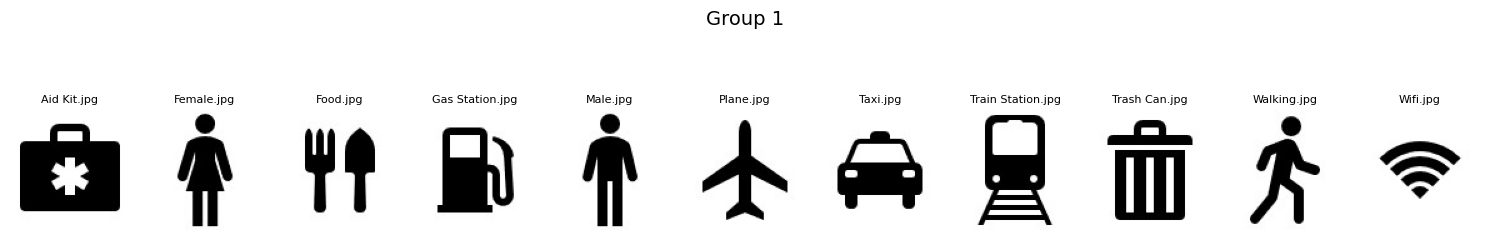

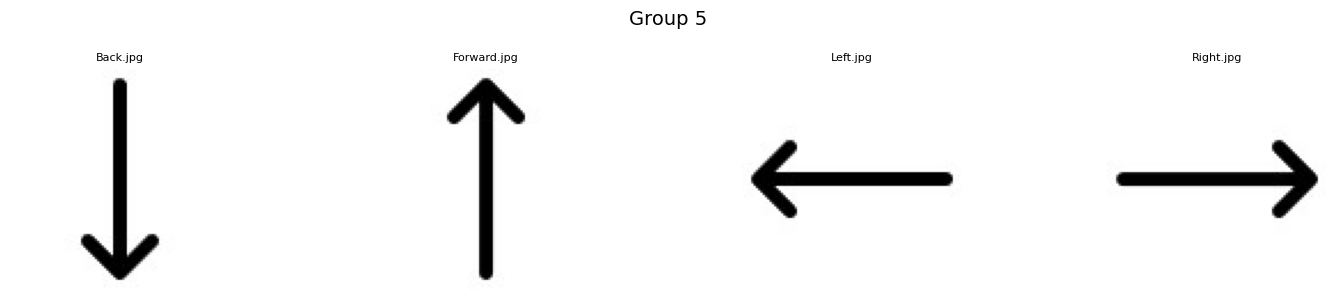

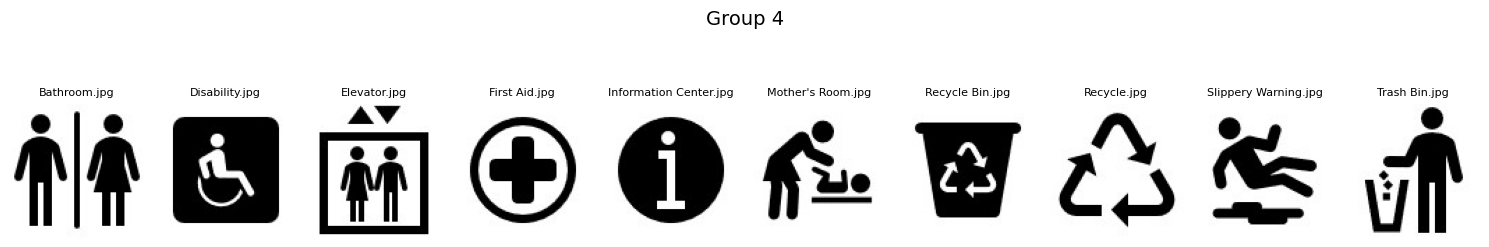

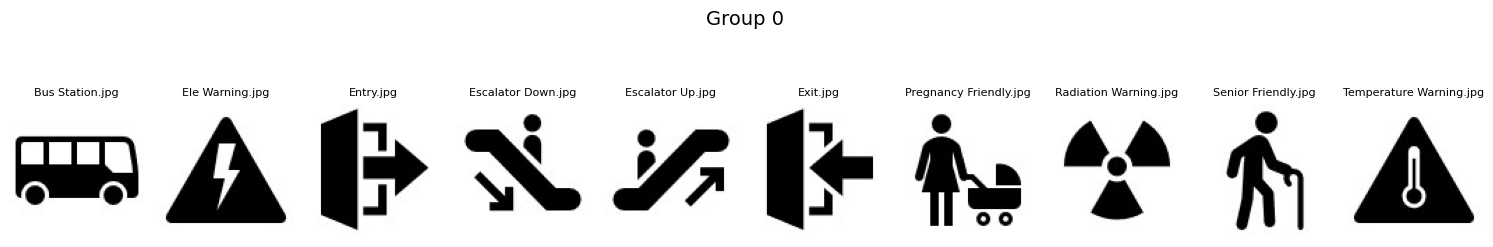

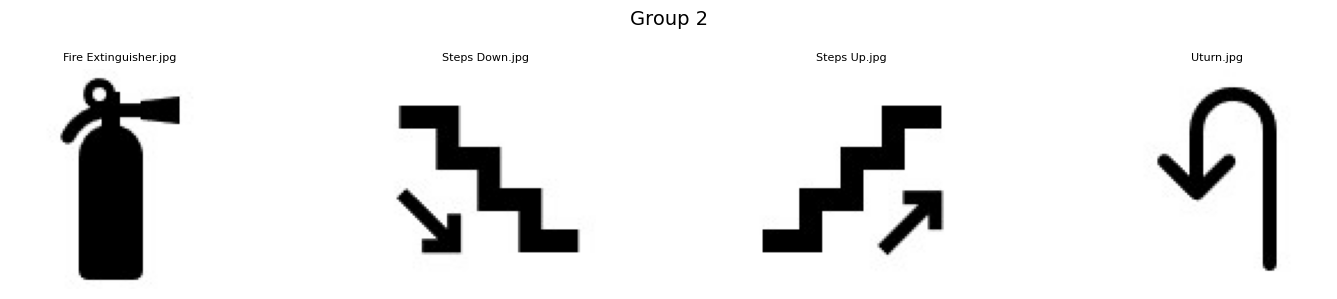

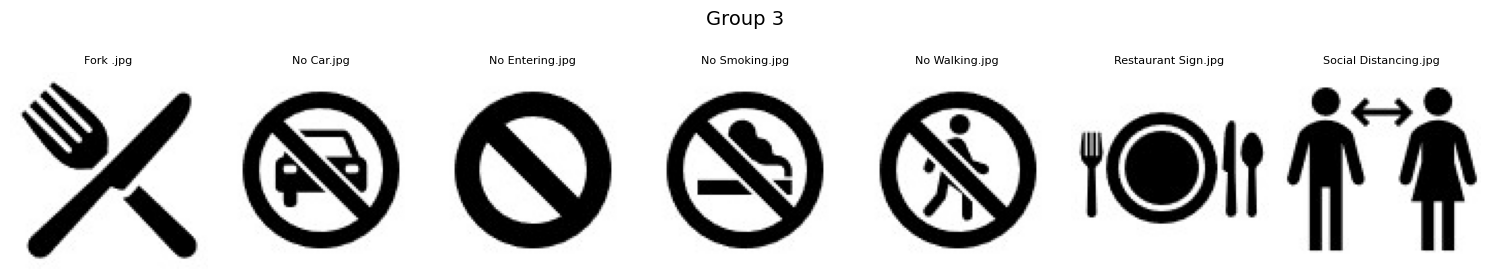

In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from PIL import Image

# --- Compute metrics function (same as yours) ---
def compute_metrics(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape

    edges = cv2.Canny(image, 100, 200)
    edge_density = np.sum(edges > 0) / (height * width)

    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_norm = hist / hist.sum()
    entropy = -np.sum(hist_norm * np.log2(hist_norm + 1e-8))

    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    flipped_h = cv2.flip(binary, 1)
    h_sym = 1 - np.mean(np.abs(binary.astype(np.float32) - flipped_h.astype(np.float32)) / 255)

    flipped_v = cv2.flip(binary, 0)
    v_sym = 1 - np.mean(np.abs(binary.astype(np.float32) - flipped_v.astype(np.float32)) / 255)

    return [edge_density, entropy, h_sym, v_sym]

# --- Process all images in the folder ---
def load_all_images_metrics(folder_path):
    metrics = []
    files = []
    for f in os.listdir(folder_path):
        if f.lower().endswith(('jpg')):
            try:
                path = os.path.join(folder_path, f)
                m = compute_metrics(path)
                metrics.append(m)
                files.append(f)
            except Exception as e:
                print(f"Skipping {f}: {e}")
    return files, np.array(metrics)

# --- Group images using clustering ---
def cluster_images(files, metrics, num_clusters):
    clustering = AgglomerativeClustering(distance_threshold=None, n_clusters=num_clusters)
    labels = clustering.fit_predict(metrics)

    groups = {}
    for file, label in zip(files, labels):
        groups.setdefault(label, []).append(file)
    return groups

# --- Display grouped icons ---
def display_groups(groups, folder_path):
    for group_id, images in groups.items():
        plt.figure(figsize=(15, 3))
        for idx, img_file in enumerate(images):
            img = Image.open(os.path.join(folder_path, img_file)).convert('RGB')
            plt.subplot(1, len(images), idx + 1)
            plt.imshow(img)
            plt.title(img_file, fontsize=8)
            plt.axis('off')
        plt.suptitle(f"Group {group_id}", fontsize=14)
        plt.tight_layout()
        plt.show()

# --- Run the full pipeline ---
folder_path = r'C:\Users\localadmin\OneDrive - Johns Hopkins\EVA_WST\icons'  # <-- Change path
files, metrics = load_all_images_metrics(folder_path)
groups = cluster_images(files, metrics, num_clusters=6)  # adjust cluster count if needed
display_groups(groups, folder_path)


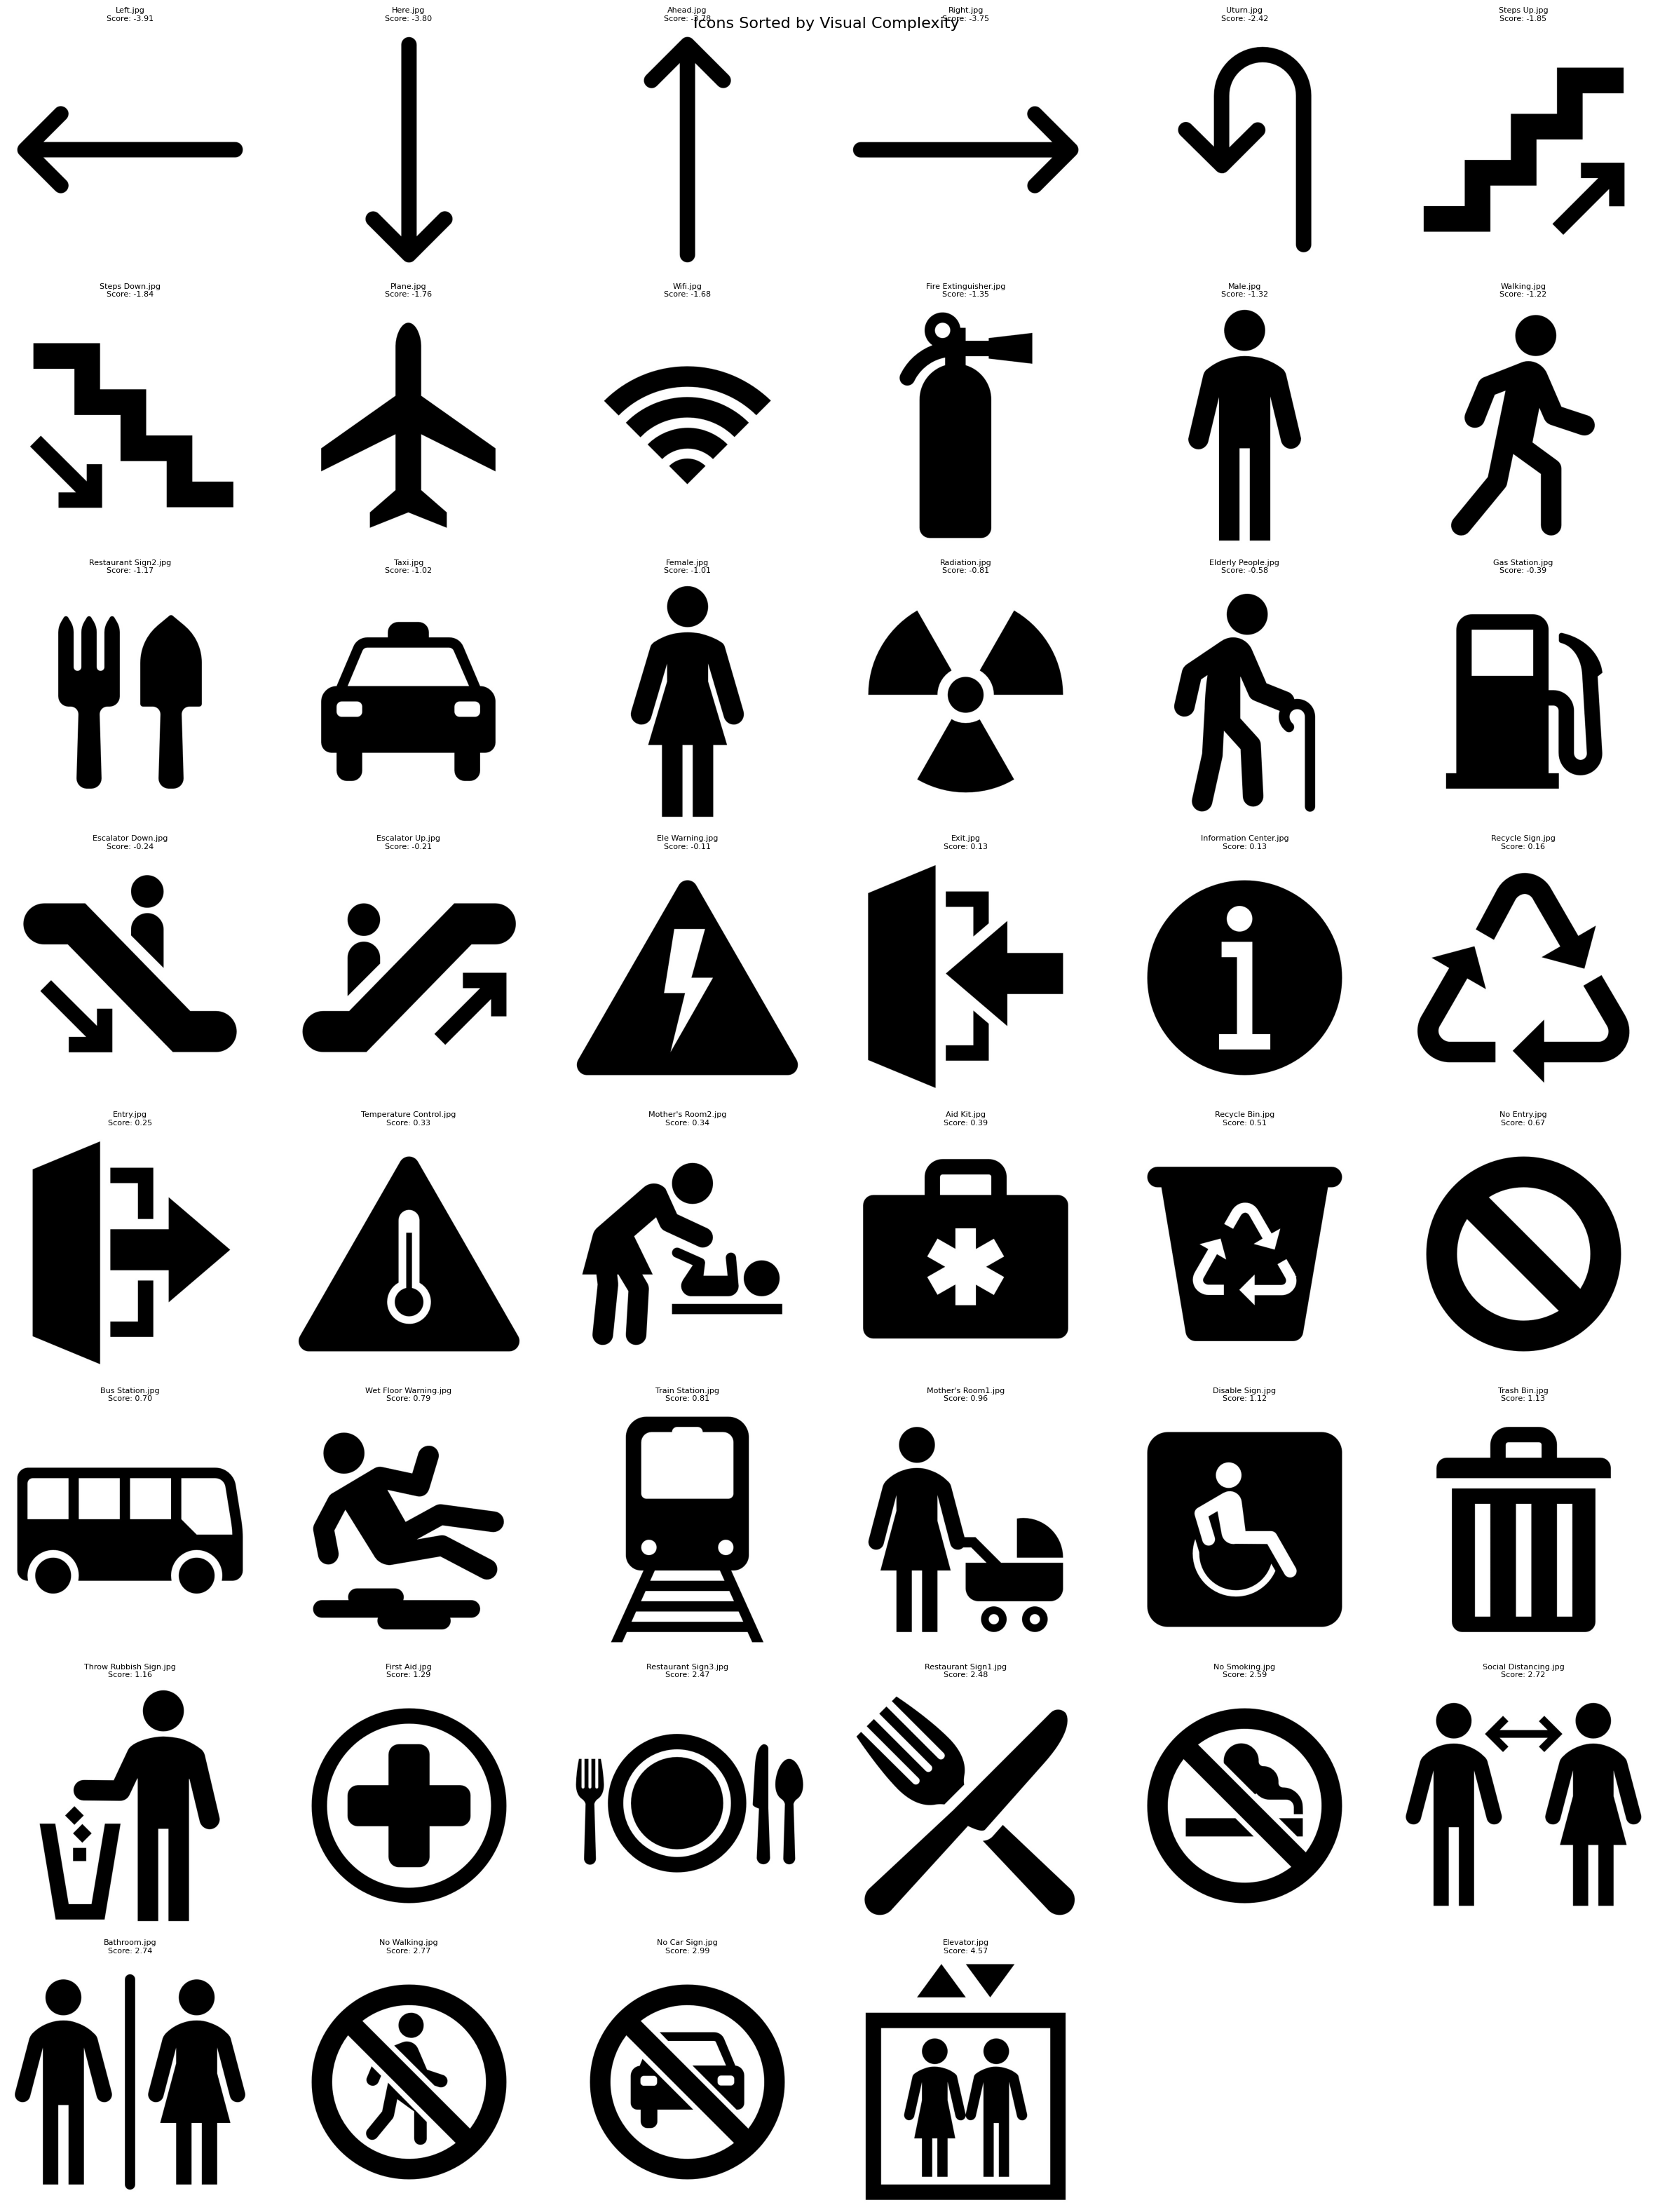

Sorted Complexity Table:


Filename  edge_density  entropy  Complexity Score
0                  Left.jpg        0.0040   0.5015           -3.9135
1                  Here.jpg        0.0040   0.5285           -3.8028
2                 Ahead.jpg        0.0040   0.5351           -3.7772
3                 Right.jpg        0.0040   0.5417           -3.7499
4                 Uturn.jpg        0.0058   0.7097           -2.4190
5              Steps Up.jpg        0.0061   0.8207           -1.8451
6            Steps Down.jpg        0.0061   0.8220           -1.8399
7                 Plane.jpg        0.0056   0.8815           -1.7604
8                  Wifi.jpg        0.0064   0.8392           -1.6768
9     Fire Extinguisher.jpg        0.0053   1.0051           -1.3491
10                 Male.jpg        0.0060   0.9503           -1.3215
11              Walking.jpg        0.0061   0.9647           -1.2239
12     Restaurant Sign2.jpg        0.0063   0.9597           -1.1715
13                 Taxi.jpg        0.0063   0.9994           -1.0234
14               Female.jpg        0.0061   1.0202           -1.0051
15            Radiation.jpg        0.0062   1.0554           -0.8063
16       Elderly People.jpg        0.0073   1.0180           -0.5799
17          Gas Station.jpg        0.0074   1.0589           -0.3860
18       Escalator Down.jpg        0.0076   1.0755           -0.2376
19         Escalator Up.jpg        0.0076   1.0818           -0.2090
20          Ele Warning.jpg        0.0067   1.1823           -0.1055
21                 Exit.jpg        0.0075   1.1710            0.1331
22   Information Center.jpg        0.0065   1.2545            0.1340
23         Recycle Sign.jpg        0.0089   1.0640            0.1650
24                Entry.jpg        0.0077   1.1848            0.2515
25  Temperature Control.jpg        0.0076   1.2124            0.3272
26       Mother's Room2.jpg        0.0088   1.1114            0.3424
27              Aid Kit.jpg        0.0076   1.2215            0.3850
28          Recycle Bin.jpg        0.0079   1.2295            0.5051
29             No Entry.jpg        0.0083   1.2322            0.6686
30          Bus Station.jpg        0.0097   1.1239            0.7007
31    Wet Floor Warning.jpg        0.0090   1.2048            0.7908
32        Train Station.jpg        0.0102   1.1104            0.8092
33       Mother's Room1.jpg        0.0097   1.1882            0.9637
34         Disable Sign.jpg        0.0089   1.2874            1.1235
35            Trash Bin.jpg        0.0106   1.1522            1.1268
36   Throw Rubbish Sign.jpg        0.0098   1.2238            1.1592
37            First Aid.jpg        0.0100   1.2343            1.2856
38     Restaurant Sign3.jpg        0.0123   1.3289            2.4703
39     Restaurant Sign1.jpg        0.0125   1.3162            2.4804
40           No Smoking.jpg        0.0123   1.3594            2.5870
41    Social Distancing.jpg        0.0126   1.3652            2.7191
42             Bathroom.jpg        0.0133   1.3111            2.7418
43           No Walking.jpg        0.0128   1.3587            2.7743
44          No Car Sign.jpg        0.0133   1.3691            2.9885
45             Elevator.jpg        0.0171   1.4320            4.5704

In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler
import cairosvg
import tempfile

# --- Configuration: Choose which metrics to include ---
included_metrics = [
    'edge_density',
    'entropy'
]

# --- Step 1: Compute complexity metrics ---
def compute_metrics(image_path):

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape
    total_pixels = height * width

    metrics = {}

    # Edge density
    if 'edge_density' in included_metrics:
        edges = cv2.Canny(image, 200, 300)
        metrics['edge_density'] = np.sum(edges > 0) / total_pixels

    # Entropy
    if 'entropy' in included_metrics:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        hist_norm = hist / hist.sum()
        metrics['entropy'] = -np.sum(hist_norm * np.log2(hist_norm + 1e-8))

    # Horizontal symmetry
    if 'horizontal_symmetry' in included_metrics:
        flipped = cv2.flip(image, 1)
        metrics['horizontal_symmetry'] = 1.0 - np.mean(np.abs(image - flipped)) / 255.0

    # Vertical symmetry
    if 'vertical_symmetry' in included_metrics:
        flipped = cv2.flip(image, 0)
        metrics['vertical_symmetry'] = 1.0 - np.mean(np.abs(image - flipped)) / 255.0

    return [metrics[m] for m in included_metrics]

# --- Step 2: Load all images and extract metrics ---
def load_metrics(folder_path):
    files = []
    metrics = []
    for f in os.listdir(folder_path):
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.svg')):
            try:
                path = os.path.join(folder_path, f)
                m = compute_metrics(path)
                files.append(f)
                metrics.append(m)
            except Exception as e:
                print(f"Failed to process {f}: {e}")
    return files, metrics

# --- Step 3: Compute a complexity score and sort ---
def sort_by_complexity(files, metrics):
    metrics = np.array(metrics)
    scaler = StandardScaler()
    scaled = scaler.fit_transform(metrics)

    complexities = np.sum(scaled, axis=1)
    data = list(zip(files, metrics.tolist(), complexities))
    data.sort(key=lambda x: x[2])
    return data

# --- Step 4: Display sorted icons and table ---
def display_sorted(data, folder_path):
    num = len(data)
    cols = min(num, 6)
    rows = int(np.ceil(num / cols))

    # Show images
    plt.figure(figsize=(4 * cols, 4 * rows))
    for idx, (fname, metrics, complexity) in enumerate(data):
        file_path = os.path.join(folder_path, fname)
        if fname.lower().endswith('.svg'):
            with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as temp_png:
                cairosvg.svg2png(url=file_path, write_to=temp_png.name)
                img = Image.open(temp_png.name).convert('RGB')
        else:
            img = Image.open(file_path).convert('RGB')

        plt.subplot(rows, cols, idx + 1)
        plt.imshow(img)
        plt.title(f"{fname}\nScore: {complexity:.2f}", fontsize=8)
        plt.axis('off')

    plt.suptitle("Icons Sorted by Visual Complexity", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Show table
    col_names = ['Filename'] + included_metrics + ['Complexity Score']
    table_data = []
    for fname, m, complexity in data:
        table_data.append([fname] + [round(v, 4) for v in m] + [round(complexity, 4)])
    df = pd.DataFrame(table_data, columns=col_names)
    print("Sorted Complexity Table:")
    display(df)

# --- Run everything ---
folder_path = r'C:\Users\localadmin\OneDrive - Johns Hopkins\EVA_WST\HighRes Icons'  

files, metrics = load_metrics(folder_path)
sorted_data = sort_by_complexity(files, metrics)
display_sorted(sorted_data, folder_path)


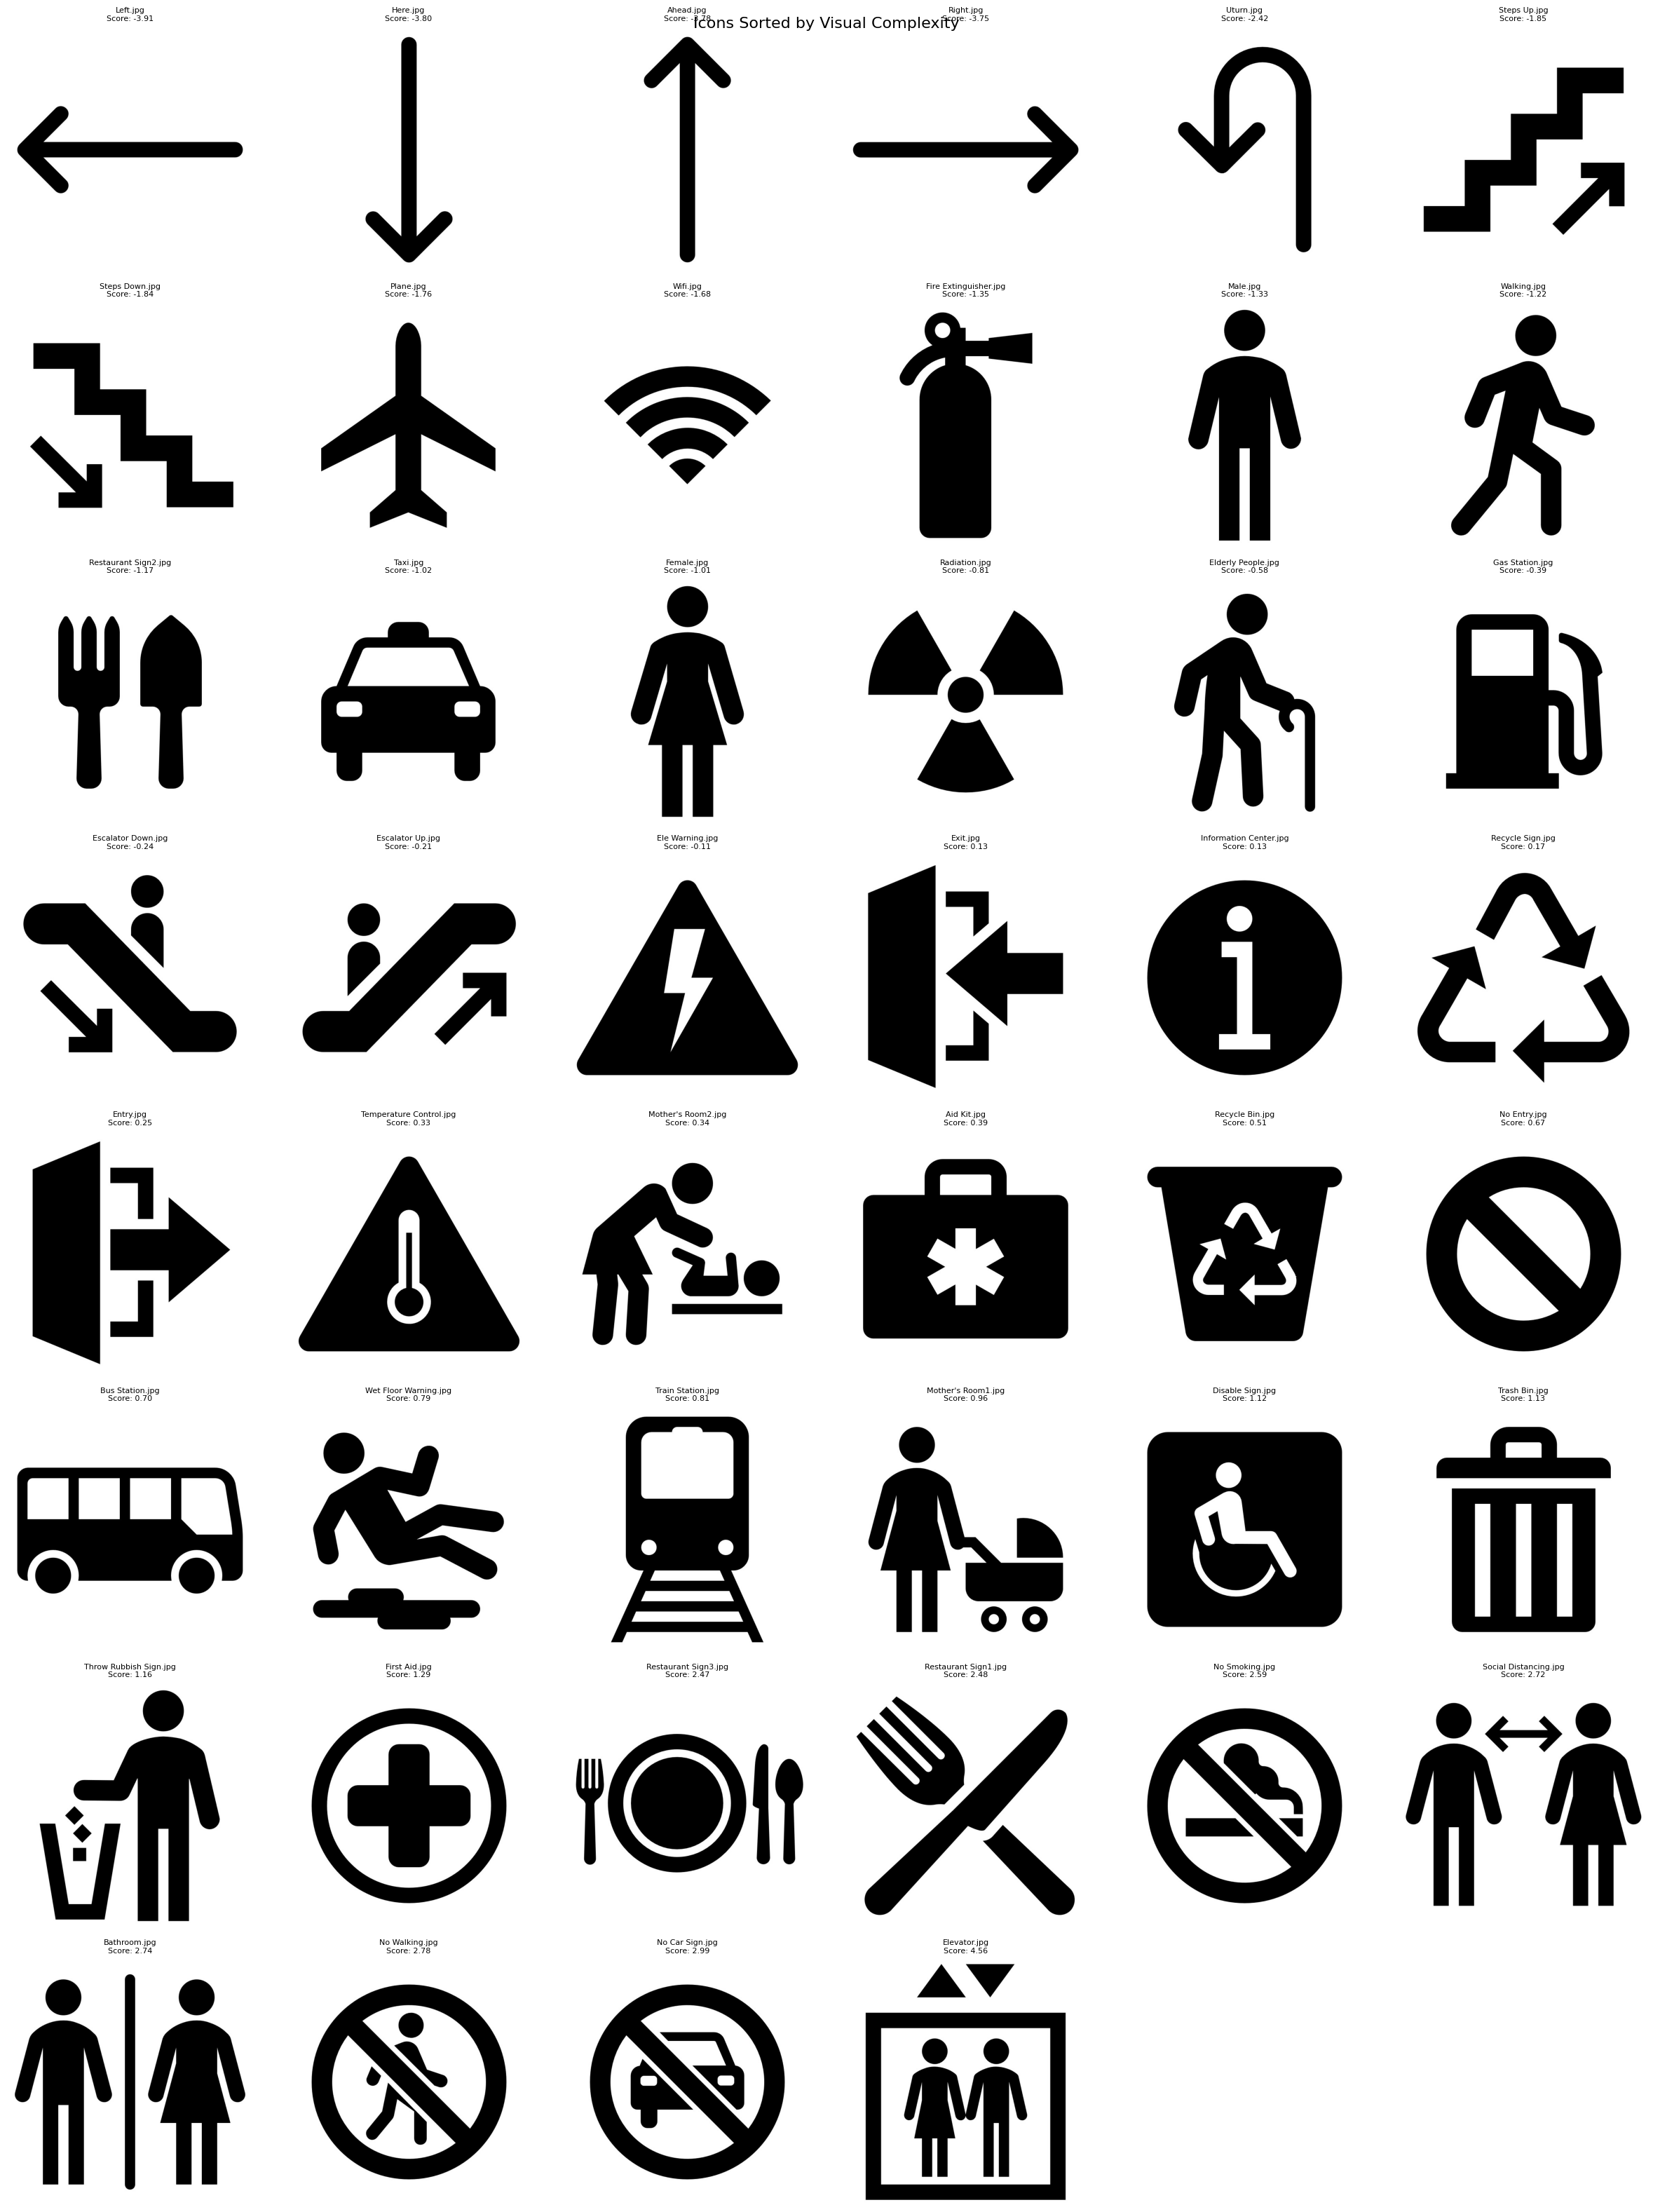

Sorted Complexity Table:


Filename  Edge Density  Entropy  Complexity Score
0                  Left.jpg        0.0040   0.5015           -3.9143
1                  Here.jpg        0.0040   0.5285           -3.8036
2                 Ahead.jpg        0.0040   0.5351           -3.7780
3                 Right.jpg        0.0040   0.5417           -3.7507
4                 Uturn.jpg        0.0058   0.7097           -2.4191
5              Steps Up.jpg        0.0061   0.8207           -1.8451
6            Steps Down.jpg        0.0061   0.8220           -1.8399
7                 Plane.jpg        0.0056   0.8815           -1.7606
8                  Wifi.jpg        0.0064   0.8392           -1.6766
9     Fire Extinguisher.jpg        0.0053   1.0051           -1.3494
10                 Male.jpg        0.0060   0.9503           -1.3255
11              Walking.jpg        0.0061   0.9647           -1.2239
12     Restaurant Sign2.jpg        0.0063   0.9597           -1.1714
13                 Taxi.jpg        0.0063   0.9994           -1.0234
14               Female.jpg        0.0061   1.0202           -1.0078
15            Radiation.jpg        0.0062   1.0554           -0.8062
16       Elderly People.jpg        0.0073   1.0180           -0.5794
17          Gas Station.jpg        0.0074   1.0589           -0.3854
18       Escalator Down.jpg        0.0076   1.0755           -0.2369
19         Escalator Up.jpg        0.0076   1.0818           -0.2083
20          Ele Warning.jpg        0.0067   1.1823           -0.1066
21                 Exit.jpg        0.0075   1.1710            0.1337
22   Information Center.jpg        0.0065   1.2545            0.1341
23         Recycle Sign.jpg        0.0089   1.0640            0.1661
24                Entry.jpg        0.0077   1.1848            0.2522
25  Temperature Control.jpg        0.0076   1.2124            0.3278
26       Mother's Room2.jpg        0.0088   1.1114            0.3435
27              Aid Kit.jpg        0.0076   1.2215            0.3856
28          Recycle Bin.jpg        0.0079   1.2295            0.5058
29             No Entry.jpg        0.0083   1.2322            0.6695
30          Bus Station.jpg        0.0097   1.1239            0.7022
31    Wet Floor Warning.jpg        0.0090   1.2048            0.7920
32        Train Station.jpg        0.0102   1.1104            0.8109
33       Mother's Room1.jpg        0.0097   1.1882            0.9571
34         Disable Sign.jpg        0.0089   1.2874            1.1233
35            Trash Bin.jpg        0.0106   1.1522            1.1286
36   Throw Rubbish Sign.jpg        0.0098   1.2238            1.1607
37            First Aid.jpg        0.0100   1.2343            1.2872
38     Restaurant Sign3.jpg        0.0123   1.3289            2.4729
39     Restaurant Sign1.jpg        0.0125   1.3162            2.4830
40           No Smoking.jpg        0.0123   1.3594            2.5895
41    Social Distancing.jpg        0.0126   1.3652            2.7157
42             Bathroom.jpg        0.0133   1.3111            2.7394
43           No Walking.jpg        0.0128   1.3587            2.7771
44          No Car Sign.jpg        0.0133   1.3691            2.9915
45             Elevator.jpg        0.0171   1.4320            4.5628

In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler
import cairosvg
import tempfile

# --- Step 1: Compute complexity metrics ---
def compute_metrics(image_path):
    # Convert SVG to temporary PNG if needed
    if image_path.lower().endswith('.svg'):
        with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as temp_png:
            cairosvg.svg2png(url=image_path, write_to=temp_png.name)
            image_path = temp_png.name

    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape
    total_pixels = height * width

    # Edge density (Canny)
    edges = cv2.Canny(image, 500, 1000)
    edge_density = np.sum(edges > 0) / total_pixels

    # Entropy
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    hist_norm = hist / hist.sum()
    entropy = -np.sum(hist_norm * np.log2(hist_norm + 1e-8))

    return [edge_density, entropy]

# --- Step 2: Load all images and extract metrics ---
def load_metrics(folder_path):
    files = []
    metrics = []
    for f in os.listdir(folder_path):
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.svg')):
            try:
                path = os.path.join(folder_path, f)
                m = compute_metrics(path)
                files.append(f)
                metrics.append(m)
            except Exception as e:
                print(f"Failed to process {f}: {e}")
    return files, metrics

# --- Step 3: Compute a complexity score and sort ---
def sort_by_complexity(files, metrics):
    metrics = np.array(metrics)
    scaler = StandardScaler()
    scaled = scaler.fit_transform(metrics)

    complexities = np.sum(scaled, axis=1)
    data = list(zip(files, metrics.tolist(), complexities))
    data.sort(key=lambda x: x[2])
    return data

# --- Step 4: Display sorted icons and table ---
def display_sorted(data, folder_path):
    num = len(data)
    cols = min(num, 6)
    rows = int(np.ceil(num / cols))

    # Show images
    plt.figure(figsize=(4 * cols, 4 * rows))
    for idx, (fname, metrics, complexity) in enumerate(data):
        file_path = os.path.join(folder_path, fname)
        if fname.lower().endswith('.svg'):
            # Convert SVG to PNG for display
            with tempfile.NamedTemporaryFile(suffix=".png", delete=False) as temp_png:
                cairosvg.svg2png(url=file_path, write_to=temp_png.name)
                img = Image.open(temp_png.name).convert('RGB')
        else:
            img = Image.open(file_path).convert('RGB')

        plt.subplot(rows, cols, idx + 1)
        plt.imshow(img)
        plt.title(f"{fname}\nScore: {complexity:.2f}", fontsize=8)
        plt.axis('off')

    plt.suptitle("Icons Sorted by Visual Complexity", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Show table
    table_data = []
    for fname, m, complexity in data:
        table_data.append([
            fname,
            round(m[0], 4),  # edge density
            round(m[1], 4),  # entropy
            round(complexity, 4)
        ])
    df = pd.DataFrame(table_data, columns=[
        'Filename', 'Edge Density', 'Entropy', 'Complexity Score'
    ])
    print("Sorted Complexity Table:")
    display(df)

# --- Run everything ---
folder_path = r'C:\Users\localadmin\OneDrive - Johns Hopkins\EVA_WST\HighRes Icons'  # Change path as needed

files, metrics = load_metrics(folder_path)
sorted_data = sort_by_complexity(files, metrics)
display_sorted(sorted_data, folder_path)



# import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler

# --- Step 1: Compute complexity metrics ---
def compute_metrics(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape
    total_pixels = height * width

    # Edge density (Canny)
    edges = cv2.Canny(image, 1, 200)
    edge_density = np.sum(edges > 0) / total_pixels

    return [edge_density]

# --- Step 2: Load all images and extract metrics ---
def load_metrics(folder_path):
    files = []
    metrics = []
    for f in os.listdir(folder_path):
        if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif')):
            try:
                path = os.path.join(folder_path, f)
                m = compute_metrics(path)
                files.append(f)
                metrics.append(m)
            except Exception as e:
                print(f"Failed to process {f}: {e}")
    return files, metrics

# --- Step 3: Compute a complexity score and sort ---
def sort_by_complexity(files, metrics):
    metrics = np.array(metrics)
    scaler = StandardScaler()
    scaled = scaler.fit_transform(metrics)

    # Only one metric now, sum just returns that scaled edge density
    complexities = scaled.flatten()
    data = list(zip(files, metrics.tolist(), complexities))
    data.sort(key=lambda x: x[2])
    return data

# --- Step 4: Display sorted icons and table ---
def display_sorted(data, folder_path):
    num = len(data)
    cols = min(num, 6)
    rows = int(np.ceil(num / cols))

    # Show images
    plt.figure(figsize=(4 * cols, 4 * rows))
    for idx, (fname, metrics, complexity) in enumerate(data):
        img = Image.open(os.path.join(folder_path, fname)).convert('RGB')
        plt.subplot(rows, cols, idx + 1)
        plt.imshow(img)
        plt.title(f"{fname}\nScore: {complexity:.2f}", fontsize=8)
        plt.axis('off')
    plt.suptitle("Icons Sorted by Visual Complexity (Edge Density)", fontsize=16)
    plt.tight_layout()
    plt.show()

    # Show table
    table_data = []
    for fname, m, complexity in data:
        table_data.append([
            fname,
            round(m[0], 4),  # edge density
            round(complexity, 4)
        ])
    df = pd.DataFrame(table_data, columns=[
        'Filename', 'Edge Density', 'Complexity Score'
    ])
    print("Sorted Complexity Table:")
    display(df)

# --- Run everything ---
folder_path = r'C:\Users\localadmin\OneDrive - Johns Hopkins\EVA_WST\icons'  # Change path as needed

files, metrics = load_metrics(folder_path)
sorted_data = sort_by_complexity(files, metrics)
display_sorted(sorted_data, folder_path)


In [13]:
import os
from scipy.spatial.distance import euclidean

def process_directory(folder_path):
    metrics_list = []
    filenames = []

    # Supported image extensions
    extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff')

    # Loop through files in directory
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(extensions):
            full_path = os.path.join(folder_path, filename)
            try:
                metrics = compute_metrics(full_path)
                metrics_list.append(metrics)
                filenames.append(filename)
                print(f"Processed: {filename} - {metrics}")
            except Exception as e:
                print(f"Failed to process {filename}: {e}")

    return filenames, metrics_list

def compare_images(filenames, metrics_list, top_n=3):
    similarities = {}

    for i in range(len(filenames)):
        current = filenames[i]
        current_metrics = np.array(list(metrics_list[i].values()))
        distances = []

        for j in range(len(filenames)):
            if i != j:
                other_metrics = np.array(list(metrics_list[j].values()))
                dist = euclidean(current_metrics, other_metrics)
                distances.append((filenames[j], dist))

        # Sort by distance (lower means more similar)
        distances.sort(key=lambda x: x[1])
        similarities[current] = distances[:top_n]

    return similarities

# Example usage:
folder_path = r'C:\Users\localadmin\OneDrive - Johns Hopkins\EVA_WST'  # <-- update this path
filenames, metrics_list = process_directory(folder_path)
similarities = compare_images(filenames, metrics_list)

# Print results
for filename, similar in similarities.items():
    print(f"\nTop similar images to {filename}:")
    for sim_filename, distance in similar:
        print(f"  {sim_filename} (distance: {distance:.4f})")


In [14]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import os

def display_similar_images(filenames, metrics_list, similarities, folder_path, n_cols=3, figsize=(15, 10)):
    """
    Display original images and their top similar matches in a grid layout.
    
    Args:
        filenames: List of all image filenames
        metrics_list: List of all image metrics
        similarities: Dictionary of similarity results from compare_images()
        folder_path: Path to the image directory
        n_cols: Number of columns in the display grid
        figsize: Size of each figure
    """
    for i, filename in enumerate(filenames):
        # Get the original image and its similar matches
        original_path = os.path.join(folder_path, filename)
        similar_files = similarities[filename]
        
        # Create figure
        n_rows = 1 + (len(similar_files) + n_cols - 1) // n_cols
        fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
        fig.suptitle(f"Original: {filename}\n(Edge Density: {metrics_list[i]['edge_density']:.2f}, "
                     f"Entropy: {metrics_list[i]['pixel_entropy']:.2f})", y=1.05)
        
        # Flatten axes array for easier indexing
        if isinstance(axes, np.ndarray):
            axes = axes.flatten()
        else:
            axes = [axes]
        
        # Display original image
        try:
            img = Image.open(original_path)
            axes[0].imshow(img)
            axes[0].set_title("Original", pad=10)
            axes[0].axis('off')
        except Exception as e:
            axes[0].text(0.5, 0.5, f"Error loading\n{filename}", ha='center', va='center')
            axes[0].axis('off')
        
        # Display similar images
        for j, (sim_filename, distance) in enumerate(similar_files, start=1):
            try:
                sim_path = os.path.join(folder_path, sim_filename)
                img = Image.open(sim_path)
                ax = axes[j]
                ax.imshow(img)
                ax.set_title(f"Similar #{j}\n{distance:.2f}", pad=10)
                ax.axis('off')
            except Exception as e:
                axes[j].text(0.5, 0.5, f"Error loading\n{sim_filename}", ha='center', va='center')
                axes[j].axis('off')
        
        # Hide any empty axes
        for j in range(len(similar_files)+1, len(axes)):
            axes[j].axis('off')
        
        plt.tight_layout()
        plt.show()

# Example usage:
folder_path = r'C:\Users\localadmin\OneDrive - Johns Hopkins\EVA_WST\icons'
filenames, metrics_list = process_directory(folder_path)
similarities = compare_images(filenames, metrics_list)

# Display results
display_similar_images(filenames, metrics_list, similarities, folder_path)

Processed: Aid Kit.jpg - [np.float64(0.054036458333333336), np.float32(1.7678474), np.float32(0.99956596), np.float32(0.7795139)]
Processed: Back.jpg - [np.float64(0.029188368055555556), np.float32(1.0317914), np.float32(0.99934894), np.float32(0.9503038)]
Processed: Bathroom.jpg - [np.float64(0.0978732638888889), np.float32(2.555952), np.float32(0.9641927), np.float32(0.8313802)]
Processed: Bus Station.jpg - [np.float64(0.07118055555555555), np.float32(2.1710982), np.float32(0.8769531), np.float32(0.718533)]
Processed: Disability.jpg - [np.float64(0.06575520833333333), np.float32(2.358264), np.float32(0.8951823), np.float32(0.9042969)]
Processed: Ele Warning.jpg - [np.float64(0.04904513888888889), np.float32(2.2166934), np.float32(0.97417533), np.float32(0.61176217)]
Processed: Elevator.jpg - [np.float64(0.1208767361111111), np.float32(2.4896472), np.float32(0.96137154), np.float32(0.6970486)]
Processed: Entry.jpg - [np.float64(0.05588107638888889), np.float32(2.3152876), np.float32(0

AttributeError: 'list' object has no attribute 'values'

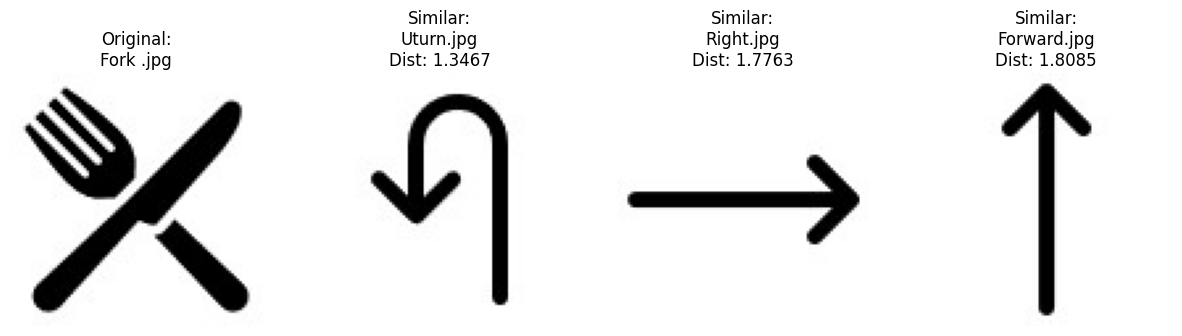

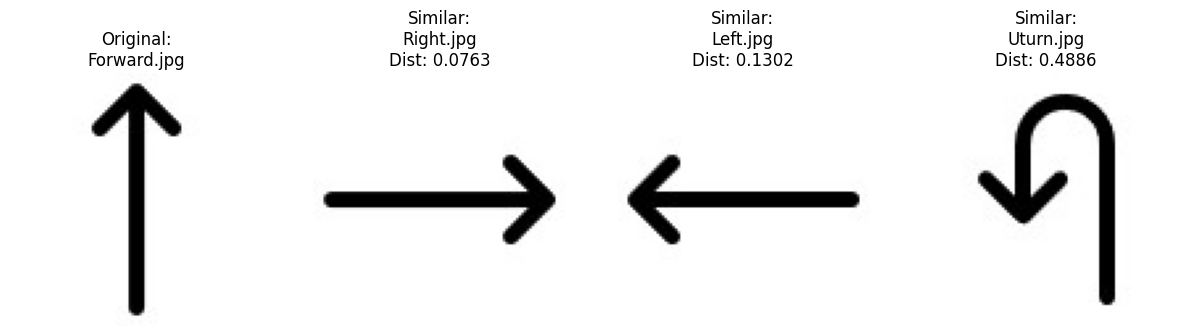

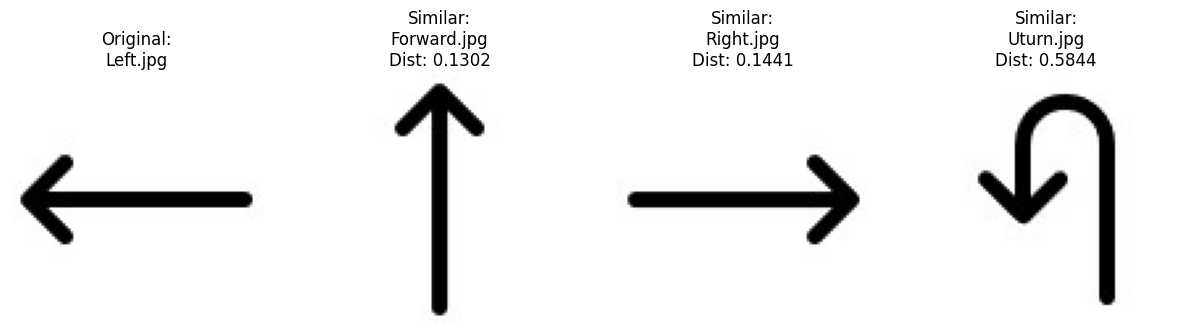

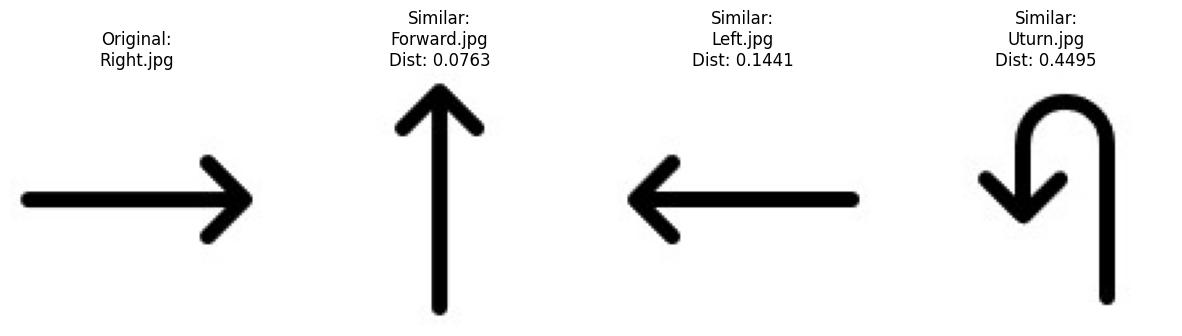

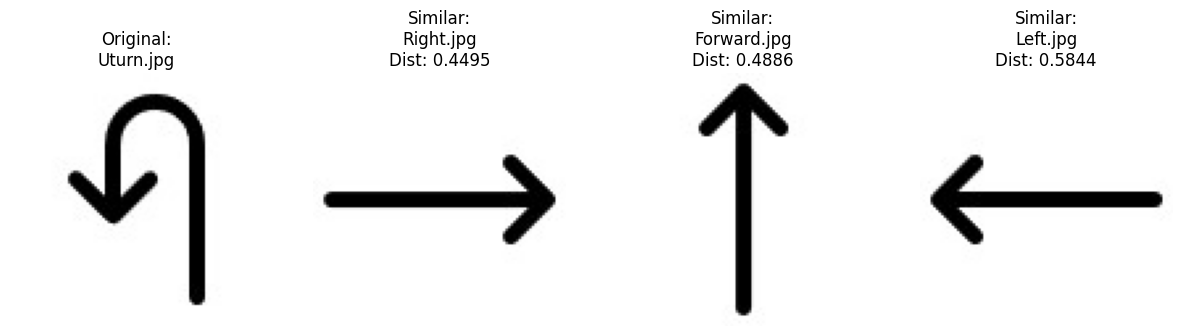

In [6]:
import matplotlib.pyplot as plt
import cv2

def show_similar_images(folder_path, similarities, top_n=3):
    for img_name, sim_list in similarities.items():
        plt.figure(figsize=(15, 5))
        # Show the original image
        orig_img = cv2.imread(f"{folder_path}/{img_name}")
        orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, top_n + 1, 1)
        plt.imshow(orig_img)
        plt.title(f"Original:\n{img_name}")
        plt.axis('off')

        # Show similar images
        for i, (sim_name, dist) in enumerate(sim_list):
            sim_img = cv2.imread(f"{folder_path}/{sim_name}")
            sim_img = cv2.cvtColor(sim_img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, top_n + 1, i + 2)
            plt.imshow(sim_img)
            plt.title(f"Similar:\n{sim_name}\nDist: {dist:.4f}")
            plt.axis('off')

        plt.show()

# Usage example
show_similar_images(folder_path, similarities, top_n=3)
